In [1]:
#all packages and dataframes
import numpy as np
import classification
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import colors as mcolors
%matplotlib inline 
# Initialization of directory information:
thisDir = os.path.expanduser('~/Desktop/MSC_Alexis/analysis/')
outDir = thisDir + 'output/results/acc/'
subList=['MSC01','MSC02','MSC03','MSC04','MSC05','MSC06','MSC07','MSC10']
Parcel_params = classification.loadParcelParams('Gordon333',thisDir+'data/Parcel_info/')
taskList=['mem','glass','semantic','motor']
subDir = thisDir + 'output/results/subNetwork/'
randDir=thisDir + 'output/results/rdmNetwork/'
netList=['unassign','default', 'visual','fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon']
feature=[14808,10824,8736, 4620,5264,3151, 484, 4060, 2375,316, 564,45,21]
netRoi=dict([('unassign',14808),('default', 10824),('visual',8736),('fp', 4620),('dan',5264),('van',3151),('salience', 484),('co', 4060),('sm', 2375),('sm-lat', 316),('auditory', 564),('pmn',45),('pon',21)])
# Gordan Palette
enmax_palette = Parcel_params['net_colors']
color_codes_wanted = Parcel_params['networks']
cdict = dict(zip(color_codes_wanted, [mcolors.to_rgba(c) for c in enmax_palette]))
mcolors.get_named_colors_mapping().update(cdict)

#Same Task (Fig 1)
pairCV=pd.read_csv(outDir+'CV/acc.csv', usecols=[0,1,2])
t_DS=pd.read_csv(outDir+'DS/acc.csv', usecols=[0,1,2,3])
pairDS=pd.DataFrame()
for task in taskList:
    tmp=t_DS[(t_DS['task']==task)]
    tmp_mu=tmp.groupby(['train_sub']).mean()
    tmp_mu['task']=task
    pairDS=pd.concat([pairDS,tmp_mu])
pairDS.reset_index(inplace=True)
pairDS.rename(columns={'train_sub':'sub'},inplace=True)
pairDS['Analysis']='Different Person'
pairCV['Analysis']='Same Person'
pair_res=pd.concat([pairDS, pairCV])
#motor
pair_motor=pair_res[pair_res.task=='motor']
#mixed
pair_glass=pair_res[pair_res.task=='glass']
pair_sem=pair_res[pair_res.task=='semantic']
#memory
pair_mem=pair_res[pair_res.task=='mem']



#Different task (Fig 2)
SS_diff=pd.read_csv(outDir+'SS/stats.csv', usecols=[0,1,2,3])
SS_diff['analysis']='Same Person'
BS_diff=pd.read_csv(outDir+'BS/stats.csv', usecols=[0,1,2,3,4])
BS_diff['analysis']='Different Person'
diff_res=pd.concat([SS_diff, BS_diff])
#motor
diff_motor=diff_res[diff_res.train_task=='motor']
#mixed
diff_glass=diff_res[diff_res.train_task=='glass']
diff_sem=diff_res[diff_res.train_task=='semantic']
#memory
diff_mem=diff_res[diff_res.train_task=='mem']

#Make color palette
MSCList=['1','2','3','4','5','6','7','10']
MSC_colors=np.array([[0, 0, 0],[0.9, 0.9, 0],[0, 1, 0],[1, 0, 0],[0, 0, 1],[0.2, 1, 1],[1, 0, 1],[1, 0.5, 0]])
MSCdict=dict(zip(MSCList, [mcolors.to_rgba(m) for m in MSC_colors]))
mcolors.get_named_colors_mapping().update(MSCdict)

#adding thinner lines to different task analysis figure
t_SS=pd.read_csv(outDir+'SS/acc.csv',usecols=[0,1,2,3])
t_BS=pd.read_csv(outDir+'BS/acc.csv',usecols=[0,1,2,3,4])

pairBS=pd.DataFrame()
for task in taskList:
    for test_task in taskList:
        if task==test_task:
            continue
        else:
            tmp=t_BS[(t_BS.train_task==task)&(t_BS.test_task==test_task)]
            tmp_mu=tmp.groupby(['train_sub']).mean()
            tmp_mu['train_task']=task
            tmp_mu['test_task']=test_task
            pairBS=pd.concat([pairBS,tmp_mu])
pairBS.reset_index(inplace=True)
pairBS.rename(columns={'train_sub':'sub'},inplace=True)
pairBS['Analysis']='Different Person'


t_SS['Analysis']='Same Person'
DT_sep=pd.concat([pairBS, t_SS])

#motor
DT_motor=DT_sep[DT_sep.train_task=='motor']
DT_motor_sem=DT_motor[DT_motor.test_task=='semantic']
DT_motor_mem=DT_motor[DT_motor.test_task=='mem']
DT_motor_glass=DT_motor[DT_motor.test_task=='glass']
#glass
DT_glass=DT_sep[DT_sep.train_task=='glass']
DT_glass_sem=DT_glass[DT_glass.test_task=='semantic']
DT_glass_mot=DT_glass[DT_glass.test_task=='motor']
DT_glass_mem=DT_glass[DT_glass.test_task=='mem']
#semantic
DT_sem=DT_sep[DT_sep.train_task=='semantic']
DT_sem_glass=DT_sem[DT_sem.test_task=='glass']
DT_sem_mot=DT_sem[DT_sem.test_task=='motor']
DT_sem_mem=DT_sem[DT_sem.test_task=='mem']
#memory
DT_mem=DT_sep[DT_sep.train_task=='mem']
DT_mem_sem=DT_mem[DT_mem.test_task=='semantic']
DT_mem_mot=DT_mem[DT_mem.test_task=='motor']
DT_mem_glass=DT_mem[DT_mem.test_task=='glass']


multiclass=pd.read_csv('/Users/Alexis/Desktop/MSC_Alexis/analysis/output/results/acc/ALL/multiclass_acc.csv')

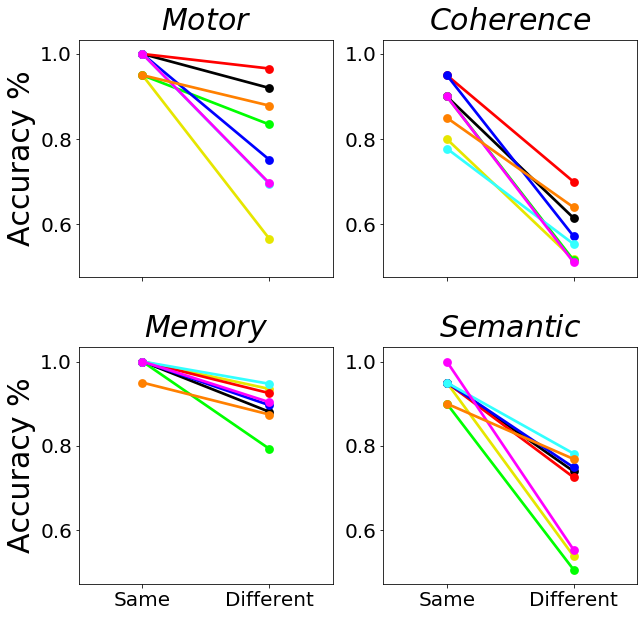

In [256]:
#Same Task (Fig 1)
fig=plt.figure(figsize=(10,10), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 1 rows by 3 columns
gs = gridspec.GridSpec(nrows=2, ncols=2, wspace=.2, hspace=.3)
"""
fig.text(.13, .893, 'A.',fontsize=20)
fig.text(.55, .893, 'B.',fontsize=20)
fig.text(.13, .465, 'C.',fontsize=20)
fig.text(.55, .465, 'D.',fontsize=20)
"""
#motor
ax1=fig.add_subplot(gs[0,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="sub", ci=None, data=pair_motor, ax=ax1, order=['Same','Different'], color='r', palette=['1','2','3','4','5','6','7','10'])
ax.legend_.remove()
ax.set_title('$Motor$', fontsize=30, pad=10)
plt.xlabel('')
plt.ylabel('Accuracy %',fontsize=30)
plt.setp(ax1.get_xticklabels(), visible=False)
ax.tick_params(labelsize=20)
#mixed
ax2=fig.add_subplot(gs[0,1],sharey=ax1)
#plt.setp(ax2.get_yticklabels(), visible=False)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub", ci=None, data=pair_glass, ax=ax2, order=['Same','Different'], color='r', palette=['1','2','3','4','5','6','7','10'])
ax.legend_.remove()
ax.set_title('$Coherence$', fontsize=30, pad=10)
plt.ylabel('')
plt.xlabel('')
plt.setp(ax2.get_xticklabels(), visible=False)
ax.tick_params(labelsize=20)
#memory
ax3=fig.add_subplot(gs[1,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="sub", ci=None, data=pair_mem,ax=ax3, order=['Same','Different'], color='r', palette=['1','2','3','4','5','6','7','10'])
ax.legend_.remove()
ax.set_title('$Memory$', fontsize=30, pad=10)
plt.ylabel('Accuracy %',fontsize=30)
plt.xlabel(' ')#,fontsize=15)
ax.tick_params(labelsize=20)
ax4=fig.add_subplot(gs[1,1],sharey=ax3)

ax=sns.pointplot(x="Analysis",y="acc", hue="sub", ci=None, data=pair_sem,ax=ax4, order=['Same','Different'], color='r', palette=['1','2','3','4','5','6','7','10'])
ax.legend_.remove()
#plt.legend(bbox_to_anchor=(1.6, 2.3),loc='upper right',fontsize='x-large')
ax.set_title('$Semantic$', fontsize=30, pad=10)
plt.ylabel('')
plt.xlabel(' ')#,fontsize=15)
ax.tick_params(labelsize=20)
plt.savefig('/Users/Alexis/Documents/Conferences/CNS2021/CVDS_point_plots.png', bbox_inches='tight')

#plt.savefig(thisDir+'output/FigsFinal/CVDS_point_plots.png', bbox_inches='tight')


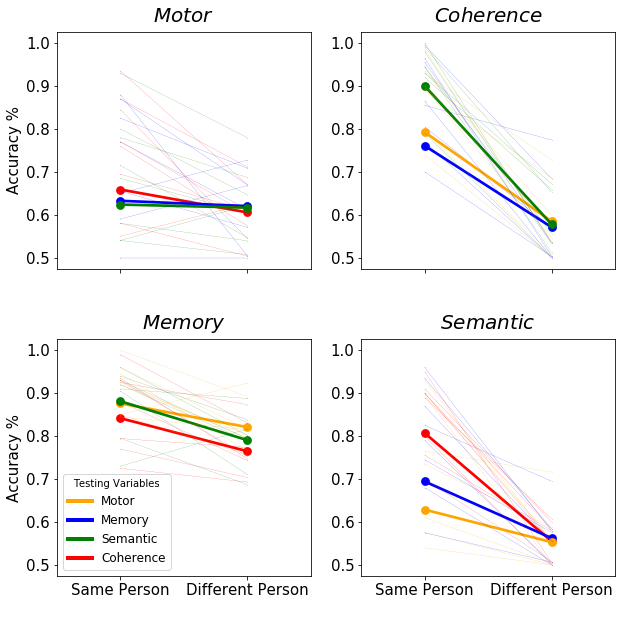

In [216]:
#Different Task (fig 2)
#need to add lines for individual Persons
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='orange', lw=4),
                Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='green', lw=4),
               Line2D([0], [0], color='red', lw=4)]
#Create figure space
fig=plt.figure(figsize=(10,10), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 1 rows by 3 columns
gs = gridspec.GridSpec(nrows=2, ncols=2, wspace=.2, hspace=.3)
"""
fig.text(.13, .893, 'A.',fontsize=20)
fig.text(.55, .893, 'B.',fontsize=20)
fig.text(.13, .465, 'C.',fontsize=20)
fig.text(.55, .465, 'D.',fontsize=20)
"""
#Motor
ax2=fig.add_subplot(gs[0,0])
#plt.setp(ax2.get_xticklabels(), visible=False)
ax=sns.pointplot(x="analysis",y="Mean", hue="test_task",  palette=['red','blue','green'],ci=None, data=diff_motor, ax=ax2)
ax.legend_.remove()
g=sns.pointplot(x="Analysis",y="acc", hue="sub",order=['Same Person','Different Person'], ci=None,scale=.05, data=DT_motor_sem, palette=['green'],ax=ax2)
g.legend_.remove()
g2=sns.pointplot(x="Analysis",y="acc", hue="sub",order=['Same Person','Different Person'], ci=None,scale=.05, data=DT_motor_mem, palette=['blue'],ax=ax2)
g2.legend_.remove()
g3=sns.pointplot(x="Analysis",y="acc", hue="sub",order=['Same Person','Different Person'], ci=None,scale=.05, data=DT_motor_glass, palette=['red'],ax=ax2)
g3.legend_.remove()
ax.set_title('$Motor$', fontsize=20, pad=10)
ax.set(xlabel=' ')
#y=[.5,.75,1.0]
#plt.yticks(y)
plt.ylabel("Accuracy %",fontsize=15)
plt.setp(ax2.get_xticklabels(), visible=False)
ax.tick_params(labelsize=15)
#Glass
ax1=fig.add_subplot(gs[0,1],sharey=ax2)
#plt.setp(ax2.get_yticklabels(), visible=False)
ax=sns.pointplot(x="analysis",y="Mean", hue="test_task", palette=['blue','orange','green'],ci=None, data=diff_glass, ax=ax1)
#plt.setp(ax1.get_xticklabels(), visible=False)
ax.legend_.remove()
g=sns.pointplot(x="Analysis",y="acc", hue="sub",order=['Same Person','Different Person'], ci=None,scale=.05, data=DT_glass_sem, palette=['green'],ax=ax1)
g.legend_.remove()
g2=sns.pointplot(x="Analysis",y="acc", hue="sub",order=['Same Person','Different Person'], ci=None,scale=.05, data=DT_glass_mem, palette=['blue'],ax=ax1)
g2.legend_.remove()
g3=sns.pointplot(x="Analysis",y="acc", hue="sub",order=['Same Person','Different Person'], ci=None,scale=.05, data=DT_glass_mot, palette=['orange'],ax=ax1)
g3.legend_.remove()
ax.set(ylabel=' ')
ax.set_title('$Coherence$', fontsize=20, pad=10)
ax.set(xlabel=' ')
#ax.legend(custom_lines, ['Motor', 'Memory', 'Semantic','Coherence'],loc='upper right',fontsize='medium',bbox_to_anchor=(1.5, 1),title='Testing Variables')
plt.setp(ax1.get_xticklabels(), visible=False)
ax.tick_params(labelsize=15)
#Memory
ax3=fig.add_subplot(gs[1,0])
ax=sns.pointplot(x="analysis",y="Mean", hue="test_task",  palette=['red','orange','green'],ci=None, data=diff_mem, ax=ax3)
ax.legend_.remove()
g=sns.pointplot(x="Analysis",y="acc", hue="sub",order=['Same Person','Different Person'], ci=None,scale=.05, data=DT_mem_sem, palette=['green'],ax=ax3)
g.legend_.remove()
g2=sns.pointplot(x="Analysis",y="acc", hue="sub",order=['Same Person','Different Person'], ci=None,scale=.05, data=DT_mem_glass, palette=['red'],ax=ax3)
g2.legend_.remove()
g3=sns.pointplot(x="Analysis",y="acc", hue="sub",order=['Same Person','Different Person'], ci=None,scale=.05, data=DT_mem_mot, palette=['orange'],ax=ax3)
g3.legend_.remove()
ax.set_title('$Memory$', fontsize=20, pad=10)
ax.legend(custom_lines, ['Motor', 'Memory', 'Semantic','Coherence'],loc='lower left',fontsize='large',title='Testing Variables')

ax.tick_params(labelsize=15)
#y=[.5,.75,1.0]
#plt.yticks(y)
plt.xlabel(' ')
#plt.xlabel('Different Task', fontsize=15)
plt.ylabel("Accuracy %",fontsize=15)
#Semantic
ax4=fig.add_subplot(gs[1,1],sharey=ax3)
#plt.setp(ax4.get_yticklabels(), visible=False)
ax=sns.pointplot(x="analysis",y="Mean", hue="test_task", ci=None, palette=['red','blue','orange'], data=diff_sem, ax=ax4)
g=sns.pointplot(x="Analysis",y="acc", hue="sub",order=['Same Person','Different Person'], ci=None,scale=.05, data=DT_sem_glass, palette=['red'],ax=ax4)
g.legend_.remove()
g2=sns.pointplot(x="Analysis",y="acc", hue="sub",order=['Same Person','Different Person'], ci=None,scale=.05, data=DT_sem_mem, palette=['blue'],ax=ax4)
g2.legend_.remove()
g3=sns.pointplot(x="Analysis",y="acc", hue="sub",order=['Same Person','Different Person'], ci=None,scale=.05, data=DT_sem_mot, palette=['orange'],ax=ax4)
g3.legend_.remove()
ax.set_title('$Semantic$', fontsize=20, pad=10)
#plt.xlabel('Different Task', fontsize=15)
ax.set(ylabel=' ')
plt.xlabel(' ')

ax.tick_params(labelsize=15)
#plt.savefig(thisDir+'output/FigsFinal/SSBS_point_plots.png', bbox_inches='tight')


plt.savefig('/Users/Alexis/Documents/Conferences/CNS2021/SSBS_point_plots.png', bbox_inches='tight')

Text(0.03, 0.8, 'Semantic')

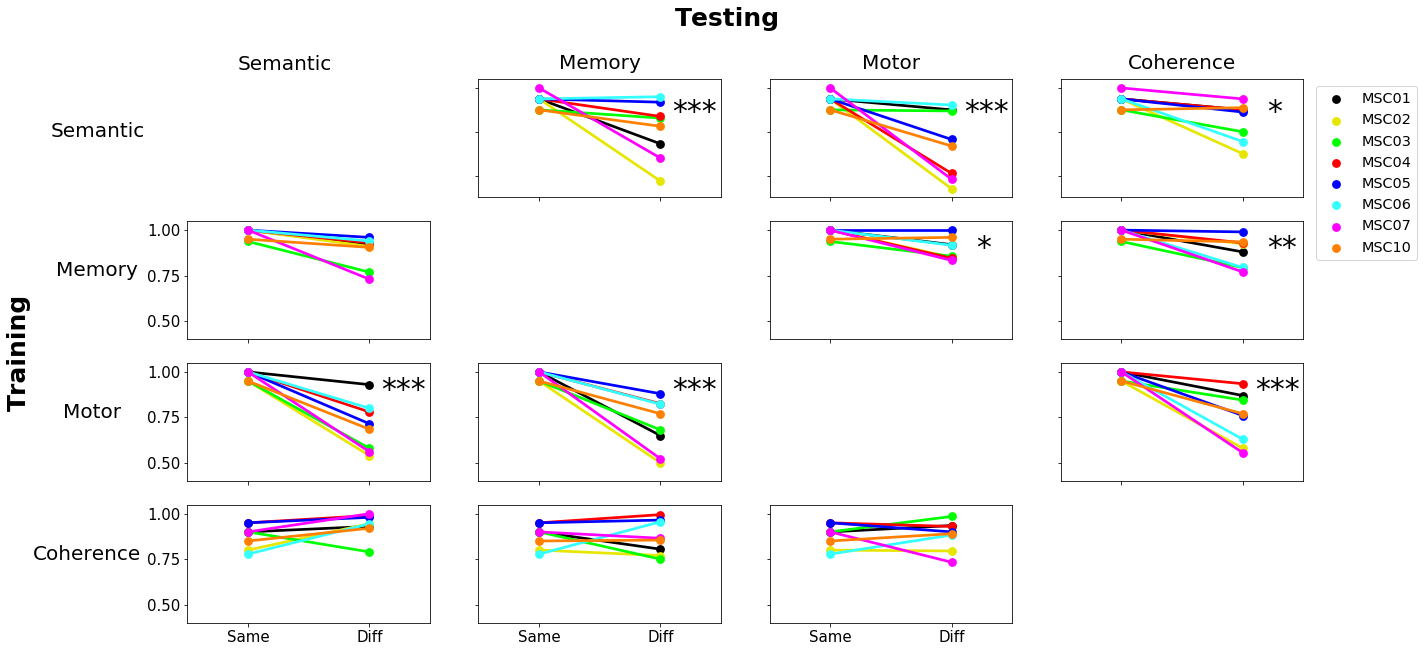

In [13]:
#CV-SS (Fig 3)
CV=pd.read_csv(outDir+'CV/acc.csv',usecols=[0,1,2])
BS=pd.read_csv(outDir+'BS/acc.csv', usecols=[0,1,2,3,4])
#SS=pd.read_csv(outDir+'SS/sep_task_acc.csv')
SS=pd.read_csv(outDir+'SS/acc.csv', usecols=[0,1,2,3])
DS=pd.read_csv(outDir+'DS/acc.csv', usecols=[0,1,2,3])
CV.rename(columns={'task':'train_task'},inplace=True)
DS.rename(columns={'task':'train_task'},inplace=True)
SS_task=SS.merge(CV, how='left', on=['train_task','sub'],suffixes=('_Diff','_Same'))
OS_task=BS.merge(DS,how='left',on=['train_task','train_sub','test_sub'],suffixes=('','_DS'))
SS_task.rename(columns={'acc_Diff':'Diff','acc_Same':'Same'},inplace=True)
OS_task.rename(columns={'acc':'Diff','acc_DS':'Same'},inplace=True)

#CV m SS
#train motor test memory 
motTmem=SS_task[(SS_task['train_task']=='motor')& (SS_task['test_task']=='mem')]
motTmem.drop(columns=['train_task','test_task'],inplace=True)
motTmem=pd.melt(motTmem, id_vars=['sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')
#train motor test semantic 
motTsem=SS_task[(SS_task['train_task']=='motor')& (SS_task['test_task']=='semantic')]
motTsem.drop(columns=['train_task','test_task'],inplace=True)
motTsem=pd.melt(motTsem, id_vars=['sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')
#train motor test glass
motTglass=SS_task[(SS_task['train_task']=='motor')& (SS_task['test_task']=='glass')]
motTglass.drop(columns=['train_task','test_task'],inplace=True)
motTglass=pd.melt(motTglass, id_vars=['sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')

#train memory test memory 
memTmot=SS_task[(SS_task['train_task']=='mem')& (SS_task['test_task']=='motor')]
memTmot.drop(columns=['train_task','test_task'],inplace=True)
memTmot=pd.melt(memTmot, id_vars=['sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')
#train memory test semantic 
memTsem=SS_task[(SS_task['train_task']=='mem')& (SS_task['test_task']=='semantic')]
memTsem.drop(columns=['train_task','test_task'],inplace=True)
memTsem=pd.melt(memTsem, id_vars=['sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')
#train memory test glass
memTglass=SS_task[(SS_task['train_task']=='mem')& (SS_task['test_task']=='glass')]
memTglass.drop(columns=['train_task','test_task'],inplace=True)
memTglass=pd.melt(memTglass, id_vars=['sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')

#train glass test motor 
glassTmot=SS_task[(SS_task['train_task']=='glass')& (SS_task['test_task']=='motor')]
glassTmot.drop(columns=['train_task','test_task'],inplace=True)
glassTmot=pd.melt(glassTmot, id_vars=['sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')
#train glass test semantic 
glassTsem=SS_task[(SS_task['train_task']=='glass')& (SS_task['test_task']=='semantic')]
glassTsem.drop(columns=['train_task','test_task'],inplace=True)
glassTsem=pd.melt(glassTsem, id_vars=['sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')
#train glass test memory
glassTmem=SS_task[(SS_task['train_task']=='glass')& (SS_task['test_task']=='mem')]
glassTmem.drop(columns=['train_task','test_task'],inplace=True)
glassTmem=pd.melt(glassTmem, id_vars=['sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')

#train semantic test motor 
semTmot=SS_task[(SS_task['train_task']=='semantic')& (SS_task['test_task']=='motor')]
semTmot.drop(columns=['train_task','test_task'],inplace=True)
semTmot=pd.melt(semTmot, id_vars=['sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')
#train semantic test glass
semTglass=SS_task[(SS_task['train_task']=='semantic')& (SS_task['test_task']=='glass')]
semTglass.drop(columns=['train_task','test_task'],inplace=True)
semTglass=pd.melt(semTglass, id_vars=['sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')
#train semantic test memory
semTmem=SS_task[(SS_task['train_task']=='semantic')& (SS_task['test_task']=='mem')]
semTmem.drop(columns=['train_task','test_task'],inplace=True)
semTmem=pd.melt(semTmem, id_vars=['sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')

 
#Diff task 
fig=plt.figure(figsize=(20,10), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 1 rows by 3 columns
gs = gridspec.GridSpec(nrows=4, ncols=4)
fig.suptitle('Testing', fontsize=25, fontweight='bold')
fig.text(-0.0001, 0.5, 'Training', va='center', fontweight='bold',fontsize=25,rotation='vertical')



#Semantic test memory
ax1=fig.add_subplot(gs[0,1])
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=semTmem, ax=ax1)
ax.set_title('Memory',fontsize=20, pad=10)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax1.get_yticklabels(), visible=False)
plt.setp(ax1.get_xticklabels(), visible=False)
ax1.text(1.1, .85, '***',fontsize=30)
"""
#Test Semantic blank
ax0=fig.add_subplot(gs[0,0],sharey=ax1)
y=[.5,.75,1.0]
plt.yticks(y,fontsize=15)
plt.setp(ax0.get_xticklabels(), visible=False)
ax0.set_title('Semantic', fontsize=20, pad=10)
ax0.set_ylabel('Semantic', rotation=0, fontsize=20, labelpad=50)
ax.set(ylim=(.4, 1.05))
"""
#Semantic test Motor
ax2=fig.add_subplot(gs[0,2],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=semTmot, ax=ax2)
ax.set_title('Motor', fontsize=20, pad=10)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
ax2.text(1.1, .85, '***',fontsize=30)
#Semantic test glass
ax3=fig.add_subplot(gs[0,3],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=semTglass, ax=ax3)
ax.set_title('Coherence', fontsize=20, pad=10)
plt.legend(bbox_to_anchor=(1.5, 1.0),loc='upper right',fontsize='x-large')
ax.set(xlabel='')
ax.set(ylabel='')
plt.setp(ax3.get_yticklabels(), visible=False)
plt.setp(ax3.get_xticklabels(), visible=False)
ax3.text(1.2, .85, '*',fontsize=30)
#Memory test semantic
ax4=fig.add_subplot(gs[1,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=memTsem, ax=ax4)
ax.set_ylabel('Memory', rotation=0, fontsize=20, labelpad=50)
ax.set(xlabel='')
ax.legend_.remove()
plt.setp(ax4.get_xticklabels(), visible=False)
ax.set(ylim=(.4, 1.05))
ax.tick_params(labelsize=15)
plt.yticks(y)
#Memory test memory\
"""
ax5=fig.add_subplot(gs[1,1])
plt.setp(ax5.get_yticklabels(), visible=False)
plt.setp(ax5.get_xticklabels(), visible=False)
"""
#Memory test motor
ax6=fig.add_subplot(gs[1,2], sharey=ax4)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=memTmot, ax=ax6)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax6.get_yticklabels(), visible=False)
plt.setp(ax6.get_xticklabels(), visible=False)
ax6.text(1.2, .85, '*',fontsize=30)
#Memory test glass
ax7=fig.add_subplot(gs[1,3], sharey=ax4)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=memTglass, ax=ax7)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax7.get_yticklabels(), visible=False)
plt.setp(ax7.get_xticklabels(), visible=False)
ax7.text(1.2, .85, '**',fontsize=30)
#Motor test semantic
ax8=fig.add_subplot(gs[2,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=motTsem, ax=ax8)
ax.set_ylabel('Motor', rotation=0, fontsize=20, labelpad=55)
ax.set(xlabel='')
ax.legend_.remove()
ax.set(ylim=(.4, 1.05))
plt.yticks(y)
ax.tick_params(labelsize=15)
plt.setp(ax8.get_xticklabels(), visible=False)
ax8.text(1.1, .85, '***',fontsize=30)
#motor test mem
ax9=fig.add_subplot(gs[2,1],sharey=ax8)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=motTmem, ax=ax9)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax9.get_yticklabels(), visible=False)
plt.setp(ax9.get_xticklabels(), visible=False)
ax9.text(1.1, .85, '***',fontsize=30)

"""
#Motor test motor
ax10=fig.add_subplot(gs[2,2])
plt.setp(ax10.get_yticklabels(), visible=False)
plt.setp(ax10.get_xticklabels(), visible=False)
"""
#motor test glass
ax11=fig.add_subplot(gs[2,3],sharey=ax8)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=motTglass, ax=ax11)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax11.get_yticklabels(), visible=False)
plt.setp(ax11.get_xticklabels(), visible=False)
ax11.text(1.1, .85, '***',fontsize=30)

#Glass test semantic
ax12=fig.add_subplot(gs[3,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=glassTsem, ax=ax12)
ax.set_ylabel('Coherence', rotation=0, fontsize=20, labelpad=60)
ax.set(xlabel='')
ax.legend_.remove()
ax.set(ylim=(.4, 1.05))
plt.yticks(y)
ax.tick_params(labelsize=15)

#glass test mem
ax13=fig.add_subplot(gs[3,1],sharey=ax12)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=glassTmem, ax=ax13)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax13.get_yticklabels(), visible=False)
ax.tick_params(labelsize=15)


#glass test motor
ax14=fig.add_subplot(gs[3,2],sharey=ax12)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=glassTmot, ax=ax14)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax14.get_yticklabels(), visible=False)
ax.tick_params(labelsize=15)


fig.text(.16, .893, 'Semantic',fontsize=20)
fig.text(.03, .8, 'Semantic',fontsize=20)

#plt.savefig(thisDir+'output/FigsFinal/DT_CVmSS_plots.png', bbox_inches='tight')




In [46]:
#All trained on semantic merging testing tasks
semanticAll=pd.concat([semTmem, semTmot, semTglass])
#Motor
motorAll=pd.concat([motTmem, motTsem, motTglass])
#Memory
memAll=pd.concat([memTsem, memTmot, memTglass])
#Glass
glassAll=pd.concat([glassTmem, glassTmot, glassTsem])

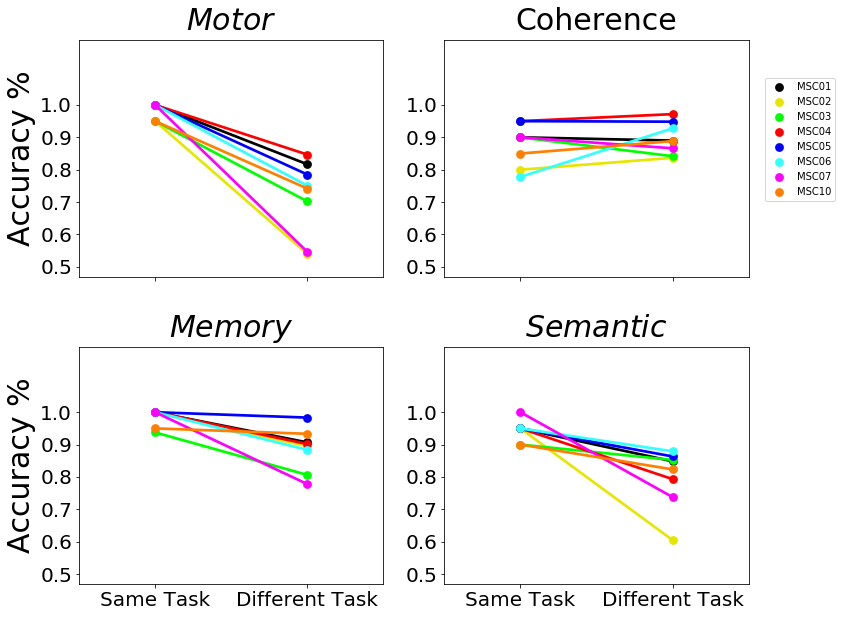

In [48]:
fig=plt.figure(figsize=(12,10), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
gs = gridspec.GridSpec(nrows=2, ncols=2,wspace=.2,hspace=.3)
#Broad overview of changing from same task to diff task
#All Glass
"""
fig.text(.13, .893, 'A.',fontsize=20)
fig.text(.55, .893, 'B.',fontsize=20)
fig.text(.13, .465, 'C.',fontsize=20)
fig.text(.55, .465, 'D.',fontsize=20)
"""
ax1=fig.add_subplot(gs[0,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=motorAll, ax=ax1)
ax.set_title('$Motor$',fontsize=30, pad=10)
ax.set(xlabel='')
plt.ylabel('Accuracy %',fontsize=30)
ax.legend_.remove()
position=(0,1)
labels=("Same Task","Different Task")
plt.xticks(position,labels)
plt.setp(ax1.get_xticklabels(), visible=False)
ax.tick_params(labelsize=20)
#All Memory
ax2=fig.add_subplot(gs[0,1],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=glassAll, ax=ax2)
ax.set_title('Coherence',fontsize=30, pad=10)
ax.set(xlabel='')
ax.set(ylabel='')
y=[.5,.6,.7,.8,.9,1.0]
plt.ylim(.47, 1.2)
plt.yticks(y)
position=(0,1)
ax.legend(title='',loc='lower right', bbox_to_anchor=(1.3,.3))
#plt.legend(bbox_to_anchor=(1.5, 1.0),loc='upper right',fontsize='x-large')
position=(0,1)
labels=("Same Task","Different Task")
plt.xticks(position,labels)
plt.setp(ax2.get_xticklabels(), visible=False)
ax.tick_params(labelsize=20)
y=[.5,.6,.7,.8,.9,1.0]
plt.ylim(.47, 1.2)
plt.yticks(y)
position=(0,1)
#all Motor
ax3=fig.add_subplot(gs[1,0],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=memAll, ax=ax3)
ax.set_title('$Memory$',fontsize=30, pad=10)
plt.xlabel('')#,fontsize=15)
plt.ylabel('Accuracy %',fontsize=30)
ax.legend_.remove()
position=(0,1)
labels=("Same Task","Different Task")
plt.xticks(position,labels)
y=[.5,.6,.7,.8,.9,1.0]
plt.ylim(.47, 1.2)
plt.yticks(y)
position=(0,1)
ax.tick_params(labelsize=20)
#all semantic
ax4=fig.add_subplot(gs[1,1],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=semanticAll,ax=ax4)
ax.set_title('$Semantic$',fontsize=30, pad=10)
plt.ylabel(' ')
plt.xlabel(' ')
y=[.5,.6,.7,.8,.9,1.0]
plt.ylim(.47, 1.2)
plt.yticks(y)
position=(0,1)
labels=("Same Task","Different Task")
plt.xticks(position,labels)
ax.legend_.remove()
ax.tick_params(labelsize=20)
#y=[.6,.8,1.0]
#plt.yticks(y)
plt.savefig('/Users/Alexis/Documents/Conferences/CNS2021/condensed_CVmSS_plots.png', bbox_inches='tight')


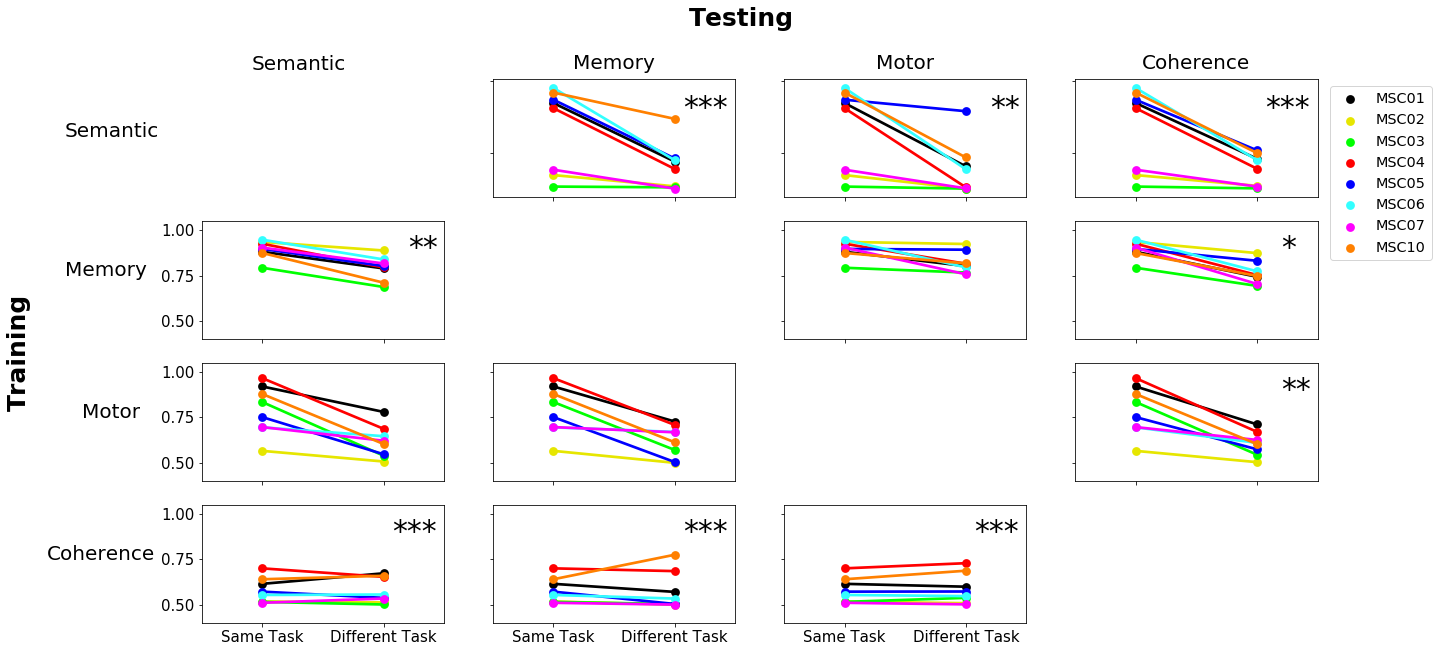

In [51]:
#DSmBS (Fig 4)
#train motor test memory 
motTmem=OS_task[(OS_task['train_task']=='motor')& (OS_task['test_task']=='mem')]
motTmem.drop(columns=['train_task','test_task'],inplace=True)
motTmem=motTmem.groupby('train_sub').mean()
motTmem.reset_index(inplace=True)
motTmem=pd.melt(motTmem, id_vars=['train_sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')

#train motor test semantic 
motTsem=OS_task[(OS_task['train_task']=='motor')& (OS_task['test_task']=='semantic')]
motTsem.drop(columns=['train_task','test_task'],inplace=True)
motTsem=motTsem.groupby('train_sub').mean()
motTsem.reset_index(inplace=True)
motTsem=pd.melt(motTsem, id_vars=['train_sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')


#train motor test glass
motTglass=OS_task[(OS_task['train_task']=='motor')& (OS_task['test_task']=='glass')]
motTglass.drop(columns=['train_task','test_task'],inplace=True)
motTglass=motTglass.groupby('train_sub').mean()
motTglass.reset_index(inplace=True)
motTglass=pd.melt(motTglass, id_vars=['train_sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')

#train memory test memory 
memTmot=OS_task[(OS_task['train_task']=='mem')& (OS_task['test_task']=='motor')]
memTmot.drop(columns=['train_task','test_task'],inplace=True)
memTmot=memTmot.groupby('train_sub').mean()
memTmot.reset_index(inplace=True)
memTmot=pd.melt(memTmot, id_vars=['train_sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')

#train memory test semantic 
memTsem=OS_task[(OS_task['train_task']=='mem')& (OS_task['test_task']=='semantic')]
memTsem.drop(columns=['train_task','test_task'],inplace=True)
memTsem=memTsem.groupby('train_sub').mean()
memTsem.reset_index(inplace=True)
memTsem=pd.melt(memTsem, id_vars=['train_sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')

#train memory test glass
memTglass=OS_task[(OS_task['train_task']=='mem')& (OS_task['test_task']=='glass')]
memTglass.drop(columns=['train_task','test_task'],inplace=True)
memTglass=memTglass.groupby('train_sub').mean()
memTglass.reset_index(inplace=True)
memTglass=pd.melt(memTglass, id_vars=['train_sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')

#train glass test motor 
glassTmot=OS_task[(OS_task['train_task']=='glass')& (OS_task['test_task']=='motor')]
glassTmot.drop(columns=['train_task','test_task'],inplace=True)
glassTmot=glassTmot.groupby('train_sub').mean()
glassTmot.reset_index(inplace=True)
glassTmot=pd.melt(glassTmot, id_vars=['train_sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')

#train glass test semantic 
glassTsem=OS_task[(OS_task['train_task']=='glass')& (OS_task['test_task']=='semantic')]
glassTsem.drop(columns=['train_task','test_task'],inplace=True)
glassTsem=glassTsem.groupby('train_sub').mean()
glassTsem.reset_index(inplace=True)
glassTsem=pd.melt(glassTsem, id_vars=['train_sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')

#train glass test memory
glassTmem=OS_task[(OS_task['train_task']=='glass')& (OS_task['test_task']=='mem')]
glassTmem.drop(columns=['train_task','test_task'],inplace=True)
glassTmem=pd.melt(glassTmem, id_vars=['train_sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')

#train semantic test motor 
semTmot=OS_task[(OS_task['train_task']=='semantic')& (OS_task['test_task']=='motor')]
semTmot.drop(columns=['train_task','test_task'],inplace=True)
semTmot=semTmot.groupby('train_sub').mean()
semTmot.reset_index(inplace=True)
semTmot=pd.melt(semTmot, id_vars=['train_sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')

#train semantic test glass
semTglass=OS_task[(OS_task['train_task']=='semantic')& (OS_task['test_task']=='glass')]
semTglass.drop(columns=['train_task','test_task'],inplace=True)
semTglass=semTglass.groupby('train_sub').mean()
semTglass.reset_index(inplace=True)
semTglass=pd.melt(semTglass, id_vars=['train_sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')

#train semantic test memory
semTmem=OS_task[(OS_task['train_task']=='semantic')& (OS_task['test_task']=='mem')]
semTmem.drop(columns=['train_task','test_task'],inplace=True)
semTmem=semTmem.groupby('train_sub').mean()
semTmem.reset_index(inplace=True)
semTmem=pd.melt(semTmem, id_vars=['train_sub'], value_vars=['Diff', 'Same'],var_name='Analysis', value_name='acc')
 
#Diff task 
fig=plt.figure(figsize=(20,10), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 1 rows by 3 columns
gs = gridspec.GridSpec(nrows=4, ncols=4)
fig.suptitle('Testing', fontsize=25, fontweight='bold')
fig.text(-0.01, 0.5, 'Training', va='center', fontweight='bold',fontsize=25,rotation='vertical')
"""
#Test Semantic blank
ax0=fig.add_subplot(gs[0,0],sharey=ax1)
y=[.5,.75,1.0]
plt.yticks(y,fontsize=15)
plt.setp(ax0.get_xticklabels(), visible=False)
ax0.set_title('Semantic', fontsize=20, pad=10)
ax0.set_ylabel('Semantic', rotation=0, fontsize=20, labelpad=50)
ax.set(ylim=(.4, 1.05))
"""
#Semantic test memory
ax1=fig.add_subplot(gs[0,1])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=semTmem, ax=ax1)
ax.set_title('Memory',fontsize=20, pad=10)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax1.get_yticklabels(), visible=False)
plt.setp(ax1.get_xticklabels(), visible=False)
ax.tick_params(labelsize=15)
ax1.text(1.07, .7, '***',fontsize=30)
#Semantic test Motor
ax2=fig.add_subplot(gs[0,2],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=semTmot, ax=ax2)
ax.set_title('Motor', fontsize=20, pad=10)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
ax2.text(1.2, .7, '**',fontsize=30)
#Semantic test glass
ax3=fig.add_subplot(gs[0,3],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=semTglass, ax=ax3)
ax.set_title('Coherence', fontsize=20, pad=10)
plt.legend(bbox_to_anchor=(1.5, 1.0),loc='upper right',fontsize='x-large')
ax.set(xlabel='')
ax.set(ylabel='')
plt.setp(ax3.get_yticklabels(), visible=False)
plt.setp(ax3.get_xticklabels(), visible=False)
ax3.text(1.07, .7, '***',fontsize=30)
#Memory test semantic
ax4=fig.add_subplot(gs[1,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=memTsem, ax=ax4)
ax.set_ylabel('Memory', rotation=0, fontsize=20, labelpad=55)
ax.set(xlabel='')
ax.legend_.remove()
plt.setp(ax4.get_xticklabels(), visible=False)
ax.set(ylim=(.4, 1.05))
plt.yticks(y)
ax.tick_params(labelsize=15)
ax4.text(1.2, .85, '**',fontsize=30)
"""
#Memory test memory
ax5=fig.add_subplot(gs[1,1])
plt.setp(ax5.get_yticklabels(), visible=False)
plt.setp(ax5.get_xticklabels(), visible=False)
"""
#Memory test motor
ax6=fig.add_subplot(gs[1,2], sharey=ax4)
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=memTmot, ax=ax6)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax6.get_yticklabels(), visible=False)
plt.setp(ax6.get_xticklabels(), visible=False)
#Memory test glass
ax7=fig.add_subplot(gs[1,3], sharey=ax4)
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=memTglass, ax=ax7)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax7.get_yticklabels(), visible=False)
plt.setp(ax7.get_xticklabels(), visible=False)
ax7.text(1.2, .85, '*',fontsize=30)
#Motor test semantic
ax8=fig.add_subplot(gs[2,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=motTsem, ax=ax8)
ax.set_ylabel('Motor', rotation=0, fontsize=20, labelpad=50)
ax.set(xlabel='')
ax.legend_.remove()
ax.tick_params(labelsize=15)
ax.set(ylim=(.4, 1.05))
plt.yticks(y)
plt.setp(ax8.get_xticklabels(), visible=False)
#motor test mem
ax9=fig.add_subplot(gs[2,1],sharey=ax8)
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=motTmem, ax=ax9)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax9.get_yticklabels(), visible=False)
plt.setp(ax9.get_xticklabels(), visible=False)
"""
#Motor test motor
ax10=fig.add_subplot(gs[2,2])
plt.setp(ax10.get_yticklabels(), visible=False)
plt.setp(ax10.get_xticklabels(), visible=False)
"""
#motor test glass
ax11=fig.add_subplot(gs[2,3],sharey=ax8)
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=motTglass, ax=ax11)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax11.get_yticklabels(), visible=False)
plt.setp(ax11.get_xticklabels(), visible=False)
ax11.text(1.2, .85, '**',fontsize=30)
#Glass test semantic
ax12=fig.add_subplot(gs[3,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=glassTsem, ax=ax12)
ax.set_ylabel('Coherence', rotation=0, fontsize=20, labelpad=60)
ax.set(xlabel='')
ax.legend_.remove()
ax.set(ylim=(.4, 1.05))
plt.yticks(y)
labels=("Same Task","Different Task")
plt.xticks(position,labels)
ax.tick_params(labelsize=15)
ax12.text(1.07, .85, '***',fontsize=30)
#glass test mem
ax13=fig.add_subplot(gs[3,1],sharey=ax12)
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=glassTmem, ax=ax13)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax13.get_yticklabels(), visible=False)
plt.xticks(position,labels)
ax.tick_params(labelsize=15)
ax13.text(1.07, .85, '***',fontsize=30)

#glass test motor
ax14=fig.add_subplot(gs[3,2],sharey=ax12)
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=glassTmot, ax=ax14)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax14.get_yticklabels(), visible=False)
plt.xticks(position,labels)
ax.tick_params(labelsize=15)
ax14.text(1.07, .85, '***',fontsize=30)
"""
#glass test glass
ax15=fig.add_subplot(gs[3,3])
plt.setp(ax15.get_yticklabels(), visible=False)
plt.setp(ax15.get_xticklabels(), visible=False)
"""
#* train mem test glass 
#** mem semantic and motor glass and semantic motor 
#***  semantic mem and semantix glass and glass test all 
fig.text(.16, .893, 'Semantic',fontsize=20)
fig.text(.03, .8, 'Semantic',fontsize=20)
plt.savefig(thisDir+'output/FigsFinal/DT_DSmBS_plots.png', bbox_inches='tight')


In [57]:
#Broad overview of different sub but same task to different task
#All trained on semantic merging testing tasks
semanticAll=pd.concat([semTmem, semTmot, semTglass])
#Motor
motorAll=pd.concat([motTmem, motTsem, motTglass])
#Memory
memAll=pd.concat([memTsem, memTmot, memTglass])
#Glass
glassAll=pd.concat([glassTmem, glassTmot, glassTsem])

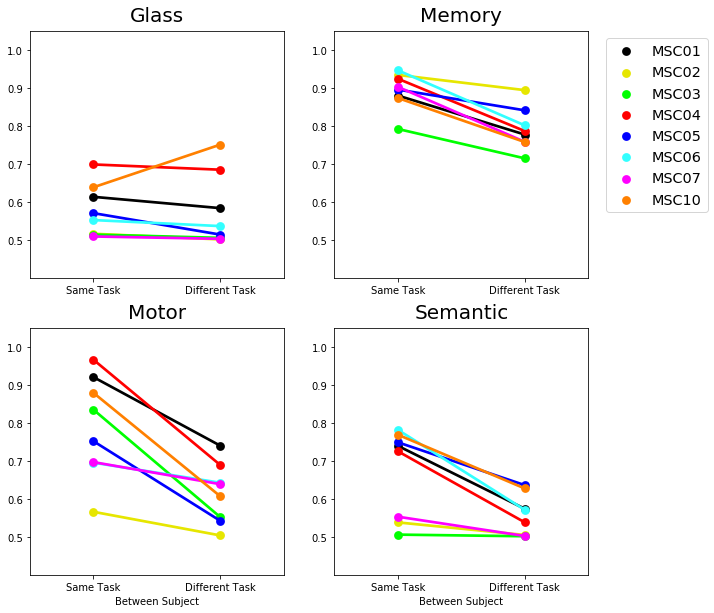

In [58]:
#Diff task 
fig=plt.figure(figsize=(10,10), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
gs = gridspec.GridSpec(nrows=2, ncols=2)
#Broad overview of changing from same task to diff task
#All Glass
ax1=fig.add_subplot(gs[0,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=glassAll, ax=ax1)
ax.set_title('Glass',fontsize=20, pad=10)
ax.set(xlabel='')
ax.set(ylabel='')
ax.set(ylim=(.4, 1.05))
y=[.5,.6,.7,.8,.9,1.0]
plt.yticks(y)
ax.legend_.remove()
position=(0,1)
labels=("Same Task","Different Task")
plt.xticks(position,labels)
#All Memory
ax2=fig.add_subplot(gs[0,1],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=memAll, ax=ax2)
ax.set_title('Memory',fontsize=20, pad=10)
ax.set(xlabel='')
ax.set(ylabel='')
plt.legend(bbox_to_anchor=(1.5, 1.0),loc='upper right',fontsize='x-large')
position=(0,1)
labels=("Same Task","Different Task")
plt.xticks(position,labels)
#all Motor
ax3=fig.add_subplot(gs[1,0],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=motorAll, ax=ax3)
ax.set_title('Motor',fontsize=20, pad=10)
ax.set(xlabel='Between Subject')
ax.set(ylabel='')
ax.legend_.remove()
position=(0,1)
labels=("Same Task","Different Task")
plt.xticks(position,labels)
#all semantic
ax4=fig.add_subplot(gs[1,1],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, ax=ax4, data=semanticAll)
ax.set_title('Semantic',fontsize=20, pad=10)
ax.set(xlabel='Between Subject')
ax.set(ylabel='')
position=(0,1)
labels=("Same Task","Different Task")
plt.xticks(position,labels)
ax.legend_.remove()

#plt.savefig(thisDir+'output/FigsFinal/condensed_DSmBS_plots.png', bbox_inches='tight')

In [225]:
#All tasks (Fig 5)
df=pd.read_csv(outDir+'ALL/precision_acc.csv')
df_re=df.groupby(['train_sub']).mean()
df_re.rename(columns={'cv_acc':'Same Person','acc':'Different Person'},inplace=True)
df_re.reset_index(inplace=True)
res=pd.melt(df_re, id_vars=['train_sub'], value_vars=['Same Person','Different Person'],var_name='Analysis',value_name='acc')

sixty_days=pd.read_csv(thisDir+'output/results/permutation/manDays.csv')
sixty_days.rename(columns={'Within':'Same Person','Between':'Different Person'},inplace=True)
sixty_res=pd.melt(sixty_days, id_vars=['Days'], value_vars=['Same Person', 'Different Person'],var_name='Analysis',value_name='acc')

In [96]:
#Feature selection (Fig 7 and 8)
#subnetworks overlapped with random network sampling
rand_DS=pd.read_csv(randDir+'DS/acc.csv')
rand_SS=pd.read_csv(randDir+'SS/acc.csv')
rand_BS=pd.read_csv(randDir+'BS/acc.csv')
#rand_CV=pd.read_csv(randDir+'CV/acc.csv')

#zscored subnetworks
CV_z=pd.read_csv(randDir+'CV/zscore_splitTask.csv')
DS_z=pd.read_csv(randDir+'DS/zscore_splitTask.csv')
#CV_z=pd.read_csv(randDir+'CV/zscore_all.csv')
SS_z=pd.read_csv(randDir+'SS/zscore_all.csv')
#DS_z=pd.read_csv(randDir+'DS/zscore_all.csv')
BS_z=pd.read_csv(randDir+'BS/zscore_all.csv')

CV_z['Analysis']='Same Person'
SS_z['Analysis']='Same Subject'
DS_z['Analysis']='Different Person'
BS_z['Analysis']='Different Subject'

ST_z=pd.concat([CV_z, DS_z])
DT_z=pd.concat([SS_z,BS_z])

def p5(x):
    return np.percentile(x,5)

# 90th Percentile
def p95(x):
    return np.percentile(x,95)

percentiles_CV=rand_DS.groupby(['feature','task']).agg({'same_sub': [p5, p95]})
percentiles_CV.columns = percentiles_CV.columns.droplevel()
percentiles_CV.reset_index(inplace=True)



percentiles_DS=rand_DS.groupby(['feature','task']).agg({'diff_sub': [p5, p95]})
percentiles_DS.columns = percentiles_DS.columns.droplevel()
percentiles_DS.reset_index(inplace=True)




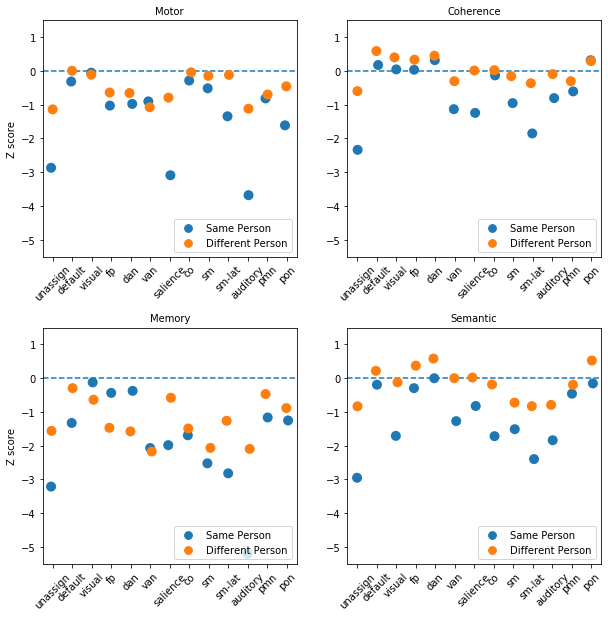

In [62]:
#CV split task z scores 
#Feature selection compared to null (Fig 7)
#fig=plt.figure(figsize=(20,20), constrained_layout=True)
#plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 2 rows by 2 columns
#gs = gridspec.GridSpec(nrows=2, ncols=2,wspace=.2, hspace=.3)
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='orange', lw=4)]
#Comparing same sub same task v diff task (Fig 2)
fig=plt.figure(figsize=(10,10), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
gs = gridspec.GridSpec(nrows=2, ncols=2,wspace=.2,hspace=.3)
#Broad overview of changing from same task to diff task

#CV split up tasks
ax1=fig.add_subplot(gs[0,0])
ax=sns.stripplot(x='network', y='z_score', hue='Analysis',data=ST_z[ST_z['task']=='motor'], hue_order=['Same Person','Different Person'],jitter=True, ax=ax1,s=10,order=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
ax.set_title('Motor',fontsize=10)
ax.set_ylabel("Z score", fontsize=10)
ax.set_xlabel('')
plt.legend(markerscale=1,fontsize=10,loc='lower right')
plt.xticks(rotation=45,fontsize=10)
ax.set(ylim=(-5.5, 1.5))
ax.axhline(0, ls='--')
ax2=fig.add_subplot(gs[0,1],sharey=ax1)
ax=sns.stripplot(x='network', y='z_score', hue='Analysis',data=ST_z[ST_z['task']=='glass'], hue_order=['Same Person','Different Person'],jitter=True, ax=ax2,s=10,order=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
ax.set_title('Coherence',fontsize=10)
ax.set_ylabel("")
ax.set_xlabel('')
plt.legend(markerscale=1,fontsize=10,loc='lower right')
plt.xticks(rotation=45,fontsize=10)
ax.axhline(0, ls='--')
ax3=fig.add_subplot(gs[1,0])
ax=sns.stripplot(x='network', y='z_score', hue='Analysis',data=ST_z[ST_z['task']=='mem'], hue_order=['Same Person','Different Person'],jitter=True, ax=ax3,s=10,order=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
ax.set_title('Memory',fontsize=10)
ax.set_ylabel("Z score", fontsize=10)
ax.set_xlabel('')
plt.legend(markerscale=1,fontsize=10,loc='lower right')
plt.xticks(rotation=45,fontsize=10)
ax.set(ylim=(-5.5, 1.5))
ax.axhline(0, ls='--')


ax4=fig.add_subplot(gs[1,1],sharey=ax3)
ax=sns.stripplot(x='network', y='z_score', hue='Analysis',data=ST_z[ST_z['task']=='semantic'], hue_order=['Same Person','Different Person'],jitter=True, ax=ax4,s=10,order=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
ax.set_title('Semantic',fontsize=10)
ax.set_ylabel("")
ax.set_xlabel('')
plt.legend(markerscale=1,fontsize=10,loc='lower right')
plt.xticks(rotation=45,fontsize=10)
ax.axhline(0, ls='--')
plt.savefig(thisDir+'output/FigsFinal/splitzscore_plots.png', bbox_inches='tight')

In [3]:
ST_z = ST_z.sort_values(['features'],ascending=False).reset_index(drop=True)

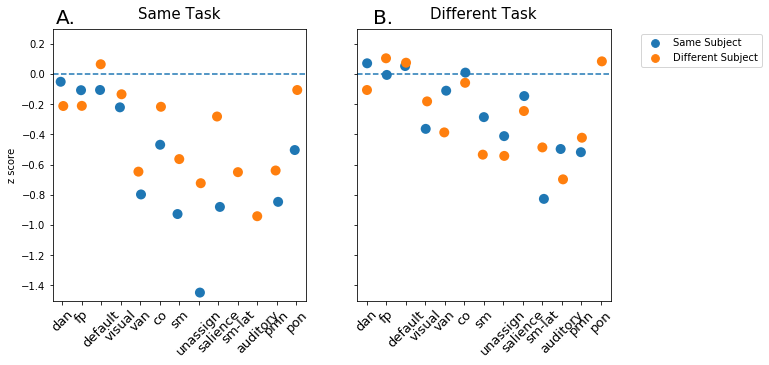

In [20]:
#Feature Z score (Fig 8)
fig=plt.figure(figsize=(10,5), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
fig.text(.13, .895, 'A.',fontsize=20)
fig.text(.57, .895, 'B.',fontsize=20)

#Add grid space for subplots 1 rows by 2 columns
gs = gridspec.GridSpec(nrows=1, ncols=2,wspace=.2, hspace=.3)
ax1=fig.add_subplot(gs[0,0])
ax=sns.stripplot(x='Network', y='z_score', hue='Analysis', data=ST_z, ax=ax1,s=10,order=['dan','fp','default','visual','van', 'co','sm','unassign','salience','sm-lat','auditory','pmn','pon'])#,palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
ax.legend_.remove()
ax.set_title('Same Task',fontsize=15, pad=10)
#x.xaxis.tick_top()
ax.axhline(0, ls='--')
plt.ylabel('z score')
plt.xlabel('')
ax.set(ylim=(-1.5, .3))
plt.xticks(rotation=45,fontsize=13)

ax2=fig.add_subplot(gs[0,1],sharey=ax1)
plt.setp(ax2.get_yticklabels(), visible=False)
ax=sns.stripplot(x='Network', y='z_score', hue='Analysis', data=DT_z, ax=ax2,s=10,order=['dan','fp','default','visual','van', 'co','sm','unassign','salience','sm-lat','auditory','pmn','pon'])#,palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
ax.set_title('Different Task',fontsize=15, pad=10)
ax.axhline(0, ls='--')
plt.xlabel('')
plt.ylabel(' ')
plt.legend(markerscale=1, bbox_to_anchor=(1.1, 1),fontsize=10)
plt.xticks(rotation=45,fontsize=13)
plt.savefig(thisDir+'output/FigsFinal/zscore_scatterplots.png', bbox_inches='tight')


In [10]:
#manipulating frames
CV_permutations=pd.read_csv(thisDir+'output/results/permutation/CV/frames.csv')
BS_permutations=pd.read_csv(thisDir+'output/results/permutation/BS/frames.csv')
SS_permutations=pd.read_csv(thisDir+'output/results/permutation/SS/frames.csv')
DS_permutations=pd.read_csv(thisDir+'output/results/permutation/DS/frames.csv')

In [11]:
CV_permutations=CV_permutations[(CV_permutations['frames']<300)]
BS_permutations=BS_permutations[(BS_permutations['frames']<300)]
SS_permutations=SS_permutations[(SS_permutations['frames']<300)]
DS_permutations=DS_permutations[(DS_permutations['frames']<300)]

CV_permutations['Time']=(CV_permutations['frames']*2.2)/60
BS_permutations['Time']=(BS_permutations['frames']*2.2)/60
SS_permutations['Time']=(SS_permutations['frames']*2.2)/60
DS_permutations['Time']=(DS_permutations['frames']*2.2)/60

In [119]:
ALL=pd.read_csv(outDir+'/ALL/acc.csv')
ALL['clf']='Ridge'
#SS
SS=pd.read_csv(outDir+'SS/acc.csv')
BS=pd.read_csv(outDir+'BS/acc.csv')
#DS
DS=pd.read_csv(outDir+'DS/acc.csv')
#CV
CV=pd.read_csv(outDir+'CV/acc.csv')

BS['Analysis']='Different Person'
SS['Analysis']='Same Person'
DS['Analysis']='Different Person'
CV['Analysis']='Same Person'

BS['clf']='Ridge'
SS['clf']='Ridge'
DS['clf']='Ridge'
CV['clf']='Ridge'

SS.drop(columns=['train_task','test_task','sub','spec','sen'],inplace=True)
BS.drop(columns=['train_task','test_task','train_sub','test_sub','spec','sen'],inplace=True)
DS.drop(columns=['train_sub','test_sub','task','spec','sen'],inplace=True)
CV.drop(columns=['task','sub','spec','sen'],inplace=True)

LR_ALL=pd.read_csv(outDir+'/ALL/acc.csv')
LR_ALL['clf']='Log'
#SS
LR_SS=pd.read_csv(thisDir+'output/results/Log/acc/SS/acc.csv')
LR_BS=pd.read_csv(thisDir+'output/results/Log/acc/BS/acc.csv')
#DS
LR_DS=pd.read_csv(thisDir+'output/results/Log/acc/DS/acc.csv')
#CV
LR_CV=pd.read_csv(thisDir+'output/results/Log/acc/CV/acc.csv')

LR_BS['Analysis']='Different Person'
LR_SS['Analysis']='Same Person'
LR_DS['Analysis']='Different Person'
LR_CV['Analysis']='Same Person'

LR_BS['clf']='Log'
LR_SS['clf']='Log'
LR_DS['clf']='Log'
LR_CV['clf']='Log'

LR_SS.drop(columns=['train_task','test_task','sub','spec','sen'],inplace=True)
LR_BS.drop(columns=['train_task','test_task','train_sub','test_sub','spec','sen'],inplace=True)
LR_DS.drop(columns=['train_sub','test_sub','task','spec','sen'],inplace=True)
LR_CV.drop(columns=['task','sub','spec','sen'],inplace=True)

SVM_ALL=pd.read_csv('/Users/Alexis/Desktop/MSC_Alexis/analysis/output/results/SVM/acc/ALL/precision_acc.csv')
SVM_ALL['clf']='SVM'
#SS
SVM_SS=pd.read_csv('/Users/Alexis/Desktop/MSC_Alexis/analysis/output/results/SVM/acc/SS/acc.csv')
SVM_BS=pd.read_csv('/Users/Alexis/Desktop/MSC_Alexis/analysis/output/results/SVM/acc/BS/acc.csv')
#DS
SVM_DS=pd.read_csv('/Users/Alexis/Desktop/MSC_Alexis/analysis/output/results/SVM/acc/DS/acc.csv')
#CV
SVM_CV=pd.read_csv('/Users/Alexis/Desktop/MSC_Alexis/analysis/output/results/SVM/acc/CV/acc.csv')

SVM_BS['Analysis']='Different Person'
SVM_SS['Analysis']='Same Person'
SVM_DS['Analysis']='Different Person'
SVM_CV['Analysis']='Same Person'

SVM_BS['clf']='SVM'
SVM_SS['clf']='SVM'
SVM_DS['clf']='SVM'
SVM_CV['clf']='SVM'

SVM_SS.drop(columns=['train_task','test_task','sub','spec','sen'],inplace=True)
SVM_BS.drop(columns=['train_task','test_task','train_sub','test_sub','spec','sen'],inplace=True)
SVM_DS.drop(columns=['train_sub','test_sub','task','spec','sen'],inplace=True)
SVM_CV.drop(columns=['task','sub','spec','sen'],inplace=True)

diffTask=pd.concat([SS,BS, LR_SS, LR_BS,SVM_SS,SVM_BS])
sameTask=pd.concat([CV,DS, LR_CV, LR_DS,SVM_CV,SVM_DS])
allAnalysis=pd.concat([ALL, LR_ALL,SVM_ALL])
allAnalysis.drop(columns=['cv_sen','cv_spec','ds_sen','ds_spec'],inplace=True)
allAnalysis.rename(columns={'acc':'Different Person','cv_acc':'Same Person'},inplace='True')
allAnalysis=pd.melt(allAnalysis,id_vars=['train_sub','test_sub','clf'],value_vars=['Different Person','Same Person'],var_name='Analysis',value_name='acc')


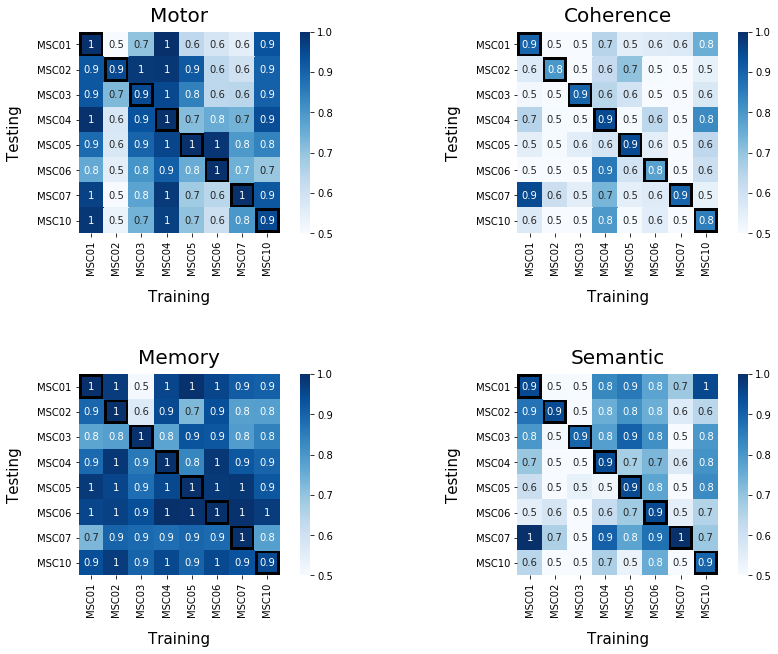

In [2]:
fig=plt.figure(figsize=(15,10), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True

fig.text(.24, .888, 'A.',fontsize=20)
#fig.text(.64, .888, 'B.',fontsize=20)
#fig.text(.24, .42, 'C.',fontsize=20)
#fig.text(.64, .42, 'D.',fontsize=20)

#Add grid space for subplots 1 rows by 2 columns
gs = gridspec.GridSpec(nrows=2, ncols=2,wspace=.1, hspace=.7)
#Comparison to the same sub same task performance
CV=pd.read_csv(outDir+'CV/acc.csv')
grouped_CV=CV.groupby('task')
#diff sub same task 
df=pd.read_csv(outDir+'DS/acc.csv')
grouped_df=df.groupby('task')
for task in taskList:
    #Same sub same task
    task_CV=grouped_CV.get_group(task)
    task_CV.drop(columns=['task'], inplace=True)
    task_CV['test_sub']=task_CV['sub']
    task_CV=task_CV.pivot(index='sub', columns='test_sub', values='acc')
    #Diff sub same task
    task_df=grouped_df.get_group(task)
    task_df.drop(columns=['task'], inplace=True)
    task_df=task_df.pivot(index='test_sub', columns='train_sub', values='acc')
    
    if task=='glass':
        ax1=fig.add_subplot(gs[0,1])
        ax=sns.heatmap(task_CV, annot=True, vmin=.5, vmax=1, cmap="Blues",ax=ax1,fmt=".1g",square=True,linewidths=5,linecolor='black',cbar=False)
        ax=sns.heatmap(task_df, annot=True, vmin=.5, vmax=1,cmap="Blues",ax=ax1,fmt=".1g",square=True)
        ax.set_title('Coherence',fontsize=20, pad=10)
        ax.set_xlabel('Training', fontsize=15,labelpad=15)
        ax.set_ylabel('Testing', fontsize=15,labelpad=15)
    elif task=='motor':
        ax2=fig.add_subplot(gs[0,0])
        ax=sns.heatmap(task_CV, annot=True, vmin=.5, vmax=1, cmap="Blues",ax=ax2,fmt=".1g",square=True,linewidths=5,linecolor='black',cbar=False)
        ax=sns.heatmap(task_df, annot=True, vmin=.5, vmax=1, cmap="Blues",ax=ax2,fmt=".1g",square=True)
        ax.set_title('Motor',fontsize=20, pad=10)
        ax.set_xlabel('Training', fontsize=15,labelpad=15)
        ax.set_ylabel('Testing', fontsize=15,labelpad=15)
    elif task=='semantic':
        ax3=fig.add_subplot(gs[1,1])
        ax=sns.heatmap(task_CV, annot=True, vmin=.5, vmax=1, cmap="Blues",ax=ax3,fmt=".1g",square=True,linewidths=5,linecolor='black',cbar=False)
        ax=sns.heatmap(task_df, annot=True, vmin=.5, vmax=1, cmap="Blues",ax=ax3,fmt=".1g",square=True)
        ax.set_title('Semantic',fontsize=20, pad=10)
        ax.set_xlabel('Training', fontsize=15,labelpad=15)
        ax.set_ylabel('Testing', fontsize=15,labelpad=15)
    else:
        ax4=fig.add_subplot(gs[1,0])
        ax=sns.heatmap(task_CV, annot=True, vmin=.5, vmax=1, cmap="Blues",ax=ax4,fmt=".1g",square=True,linewidths=5,linecolor='black',cbar=False)
        ax=sns.heatmap(task_df, annot=True, vmin=.5, vmax=1, cmap="Blues",ax=ax4,fmt=".1g",square=True)
        ax.set_title('Memory',fontsize=20, pad=10)
        ax.set_xlabel('Training', fontsize=15,labelpad=15)
        ax.set_ylabel('Testing', fontsize=15,labelpad=15)

#plt.savefig('/Users/Alexis/Documents/Conferences/CNS2021/sub_comp_heatplots.png', bbox_inches='tight')
 

#plt.savefig(thisDir+'output/FigsFinal/sub_comp_heatplots.png', bbox_inches='tight')


In [2]:
pair_motor.set_index('sub',inplace=True)
pair_motor.drop(['MSC01','MSC02','MSC03','MSC06','MSC07','MSC10'],inplace=True)
pair_motor.reset_index(inplace=True)

pair_glass.set_index('sub',inplace=True)
pair_glass.drop(['MSC01','MSC02','MSC03','MSC06','MSC07','MSC10'],inplace=True)
pair_glass.reset_index(inplace=True)

pair_mem.set_index('sub',inplace=True)
pair_mem.drop(['MSC01','MSC02','MSC03','MSC06','MSC07','MSC10'],inplace=True)
pair_mem.reset_index(inplace=True)

pair_sem.set_index('sub',inplace=True)
pair_sem.drop(['MSC01','MSC02','MSC03','MSC06','MSC07','MSC10'],inplace=True)
pair_sem.reset_index(inplace=True)

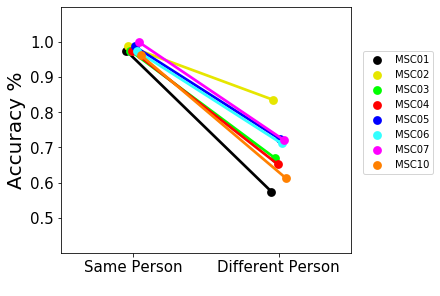

In [36]:
#poster fig
df=pd.read_csv(outDir+'ALL/acc.csv')
df_re=df.groupby(['train_sub']).mean()
df_re.rename(columns={'cv_acc':'Same Person','acc':'Different Person'},inplace=True)
df_re.reset_index(inplace=True)
res=pd.melt(df_re, id_vars=['train_sub'], value_vars=['Same Person','Different Person'],var_name='Analysis',value_name='acc')

fig=plt.figure(figsize=(6,4), constrained_layout=True)
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",ci=None, data=res, dodge=.1,order=['Same Person','Different Person'],color='r', palette=['1','2','3','4','5','6','7','10'])
#ax.legend_.remove()
#ax.set_title('All Tasks', fontsize=20, pad=10)

ax.legend(title='',loc='lower right', bbox_to_anchor=(1.3,.3))
y=[.5,.6,.7,.8,.9,1.0]
plt.ylim(.4, 1.1)
plt.yticks(y)
plt.ylabel("Accuracy %", fontsize=20)
plt.xlabel(' ')
ax.tick_params(labelsize=15)
plt.savefig('/Users/Alexis/Documents/Conferences/CNS2021/ALL_point_plots.png', bbox_inches='tight')


In [26]:
pair_motor

,sub,acc,task,Analysis
24,MSC01,0.917222,motor,Different
25,MSC02,0.566508,motor,Different
26,MSC03,0.843492,motor,Different
27,MSC04,0.968730,motor,Different
28,MSC05,0.758413,motor,Different
29,MSC06,0.796825,motor,Different
30,MSC07,0.876014,motor,Different
31,MSC10,0.872540,motor,Different
2,MSC01,1.000000,motor,Same
6,MSC02,0.950000,motor,Same


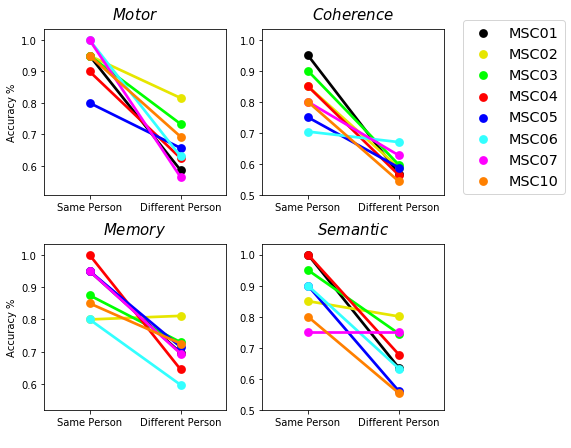

In [55]:
#reorganizing figure 1
#Same Task (Fig 1)
pairCV=pd.read_csv('/Users/Alexis/Desktop/MSC_Alexis/analysis/output/results/min/acc/CV/acc.csv', usecols=[0,1,2])
t_DS=pd.read_csv('/Users/Alexis/Desktop/MSC_Alexis/analysis/output/results/min/acc/DS/acc.csv', usecols=[0,1,2,3])
pairDS=pd.DataFrame()
for task in taskList:
    tmp=t_DS[(t_DS['task']==task)]
    tmp_mu=tmp.groupby(['train_sub']).mean()
    tmp_mu['task']=task
    pairDS=pd.concat([pairDS,tmp_mu])
pairDS.reset_index(inplace=True)
pairDS.rename(columns={'train_sub':'sub'},inplace=True)
pairDS['Analysis']='Different Person'
pairCV['Analysis']='Same Person'
pair_res=pd.concat([pairDS, pairCV])
#motor
pair_motor=pair_res[pair_res.task=='motor']
#mixed
pair_glass=pair_res[pair_res.task=='glass']
pair_sem=pair_res[pair_res.task=='semantic']
#memory
pair_mem=pair_res[pair_res.task=='mem']
#Same Task (Fig 1)
fig=plt.figure(figsize=(15,7), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 1 rows by 3 columns
gs = gridspec.GridSpec(nrows=2, ncols=4, wspace=.2, hspace=.3)
"""
fig.text(.13, .893, 'A.',fontsize=25)
fig.text(.53, .893, 'B.',fontsize=25)

fig.text(.13, .465, 'C.',fontsize=20)
fig.text(.55, .465, 'D.',fontsize=20)


ax0=fig.add_subplot(gs[0:,:2])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub", ax=ax0,ci=None, data=res, dodge=.1,order=['Same Person','Different Person'],color='r', palette=['1','2','3','4','5','6','7','10'])
ax.legend_.remove()
ax.set_title('All Tasks', fontsize=20, pad=10)
y=[.5,.6,.7,.8,.9,1.0]
plt.yticks(y)
plt.ylabel("Accuracy %", fontsize=15)
plt.xlabel(' ')
"""
#motor
ax1=fig.add_subplot(gs[0,2])
ax=sns.pointplot(x="Analysis",y="acc", hue="sub", ci=None, data=pair_motor, ax=ax1, order=['Same Person','Different Person'], color='r', hue_order=['MSC01','MSC02','MSC03','MSC04','MSC05','MSC06','MSC07','MSC10'],palette=['1','2','3','4','5','6','7','10'])
ax.legend_.remove()
ax.set_title('$Motor$', fontsize=15, pad=10)
plt.xlabel('')
y=[.5,.6,.7,.8,.9,1.0]

plt.yticks(y)
plt.ylabel('Accuracy %')
#mixed
ax2=fig.add_subplot(gs[0,3],sharey=ax1)
#plt.setp(ax2.get_yticklabels(), visible=False)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub", ci=None, data=pair_glass, ax=ax2, order=['Same Person','Different Person'], color='r',hue_order=['MSC01','MSC02','MSC03','MSC04','MSC05','MSC06','MSC07','MSC10'], palette=['1','2','3','4','5','6','7','10'])
ax.legend_.remove()
ax.set_title('$Coherence$', fontsize=15, pad=10)
y=[.5,.6,.7,.8,.9,1.0]

plt.yticks(y)
plt.ylabel('')
plt.xlabel('')
#memory
ax3=fig.add_subplot(gs[1,2])
ax=sns.pointplot(x="Analysis",y="acc", hue="sub", ci=None, data=pair_mem,ax=ax3, order=['Same Person','Different Person'], color='r', hue_order=['MSC01','MSC02','MSC03','MSC04','MSC05','MSC06','MSC07','MSC10'],palette=['1','2','3','4','5','6','7','10'])
ax.legend_.remove()
ax.set_title('$Memory$', fontsize=15, pad=10)
plt.ylabel('Accuracy %')
plt.xlabel(' ')
y=[.5,.6,.7,.8,.9,1.0]

plt.yticks(y)

ax4=fig.add_subplot(gs[1,3],sharey=ax3)
#plt.setp(ax4.get_yticklabels(), visible=False)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub", ci=None, data=pair_sem,ax=ax4, order=['Same Person','Different Person'], color='r',hue_order=['MSC01','MSC02','MSC03','MSC04','MSC05','MSC06','MSC07','MSC10'], palette=['1','2','3','4','5','6','7','10'])
plt.legend(bbox_to_anchor=(1.7, 2.4),loc='upper right',fontsize='x-large')
ax.set_title('$Semantic$', fontsize=15, pad=10)
plt.ylabel('')
y=[.5,.6,.7,.8,.9,1.0]

plt.yticks(y)
plt.xlabel('')
plt.savefig('/Users/Alexis/Documents/Conferences/CNS2021/minTimeCVDS_point_plots.png', bbox_inches='tight')










In [141]:
def p5(x):
    return np.percentile(x,5)

# 90th Percentile
def p95(x):
    return np.percentile(x,95)


percentiles_manDays=sixty_res.groupby(['Days','Analysis']).agg({'acc': [p5, p95]})
percentiles_manDays.columns = percentiles_manDays.columns.droplevel()
percentiles_manDays.reset_index(inplace=True)

In [150]:
diff_percent=percentiles_manDays[percentiles_manDays.Analysis=='Different Person']
same_percent=percentiles_manDays[percentiles_manDays.Analysis=='Same Person']

In [2]:
#group split (standard approach to machine learning and FC)
#within between training tasks only use one session with all subject one task 
CVGroup=pd.read_csv(thisDir+'output/results/groupAvg/acc.csv')
CV=pd.read_csv(outDir+'CV/stats.csv')
CV_Stand_app=CVGroup[['train_task','train_acc']]
CV_Stand_app.rename(columns={'train_task':'task','train_acc':'acc'},inplace=True)
CV.rename(columns={'Mean':'acc'},inplace=True)
CV.drop(columns={'Std'},inplace=True)
CV['Analysis']='Same Subject'
DS=pd.read_csv(outDir+'DS/stats.csv')
DS.rename(columns={'Mean':'acc'},inplace=True)
DS.drop(columns={'Std'},inplace=True)
DS['Analysis']='Different Subject'
CV_Stand_app['Analysis']='Groupwise Approach'
comp_CV=pd.concat([CV,CV_Stand_app, DS])

"""
#this involved using all the sessions leave one sub out training and testing tasks were also seperated 
dfGroup=pd.read_csv(thisDir+'output/results/groupAvg/allSess_acc.csv')
DS=pd.read_csv(outDir+'DS/stats.csv')
DS_Stand_app=dfGroup[['train_task','CV_acc']]
DS_Stand_app.rename(columns={'train_task':'task', 'CV_acc':'acc'},inplace=True)
DS.rename(columns={'Mean':'acc'},inplace=True)
DS.drop(columns={'Std'},inplace=True)
DS['Analysis']='Individualized Classifiers'
DS_Stand_app['Analysis']='Standard mL Approach'
comp_DS=pd.concat([DS, DS_Stand_app])

SS=pd.read_csv(outDir+'SS/stats.csv')
SS_Stand_app=dfGroup[['train_task','test_task','SS_acc']]
SS_Stand_app.rename(columns={'SS_acc':'acc'},inplace=True)
SS.drop(columns={'Unnamed: 0','Std'},inplace=True)
SS.rename(columns={'Mean':'acc'},inplace=True)
SS['Analysis']='Individualized'
SS_Stand_app['Analysis']='Standard mL'
comp_SS=pd.concat([SS,SS_Stand_app])



BS=pd.read_csv(outDir+'BS/stats.csv')
BS_Stand_app=dfGroup[['train_task','test_task','DS_acc']]
BS_Stand_app.rename(columns={'DS_acc':'acc'},inplace=True)
BS.drop(columns={'Unnamed: 0', 'Std'},inplace=True)
BS.rename(columns={'Mean':'acc'},inplace=True)
BS['Analysis']='Individualized'
BS_Stand_app['Analysis']='Standard mL'
comp_BS=pd.concat([BS,BS_Stand_app])
"""


#all task replication but using all sessions (40T 40R 7 subs) train one session all subs (24T 24R matched via split 6 subs)
#leave one subject out (all task 40 sample with 40 rest match) test one sub session 1 (4T 4R 1 sub)
allTask_CV=pd.read_csv(thisDir+'output/results/groupAvg/allTasks_acc.csv')
groupAvg=pd.read_csv(thisDir+'output/results/groupAvg/allTasksnoRestSplit_acc.csv')
mL_mean=groupAvg.mean()

In [3]:
from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='orange', lw=4),
                Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='green', lw=4),
               Line2D([0], [0], color='red', lw=4)]
#ax=sns.pointplot(x='Analysis',y='acc',hue='task',data=comp_DS,palette=['red','blue','orange','green'])
#ax.legend(custom_lines, ['Motor', 'Memory', 'Semantic','Coherence'],loc='upper right',fontsize='medium',bbox_to_anchor=(1.36, 1),title='Training Task')
#plt.ylabel("Accuracy %", fontsize=10)
#plt.ylim(.5,1)
#ax.set_title('Different Subject Same Task', fontsize=15, pad=10)

In [132]:
#plotting within/between performance back on FC 
crossNet=thisDir + 'output/results/wtn_btw_netSelection/'
PCA=thisDir+'output/results/acc/ALL/pca50_acc.csv'
ALL=thisDir+'output/results/acc/ALL/shufflekFold_acc.csv'
PCA20=thisDir+'output/results/acc/ALL/pca20_acc.csv'
PCA05=thisDir+'output/results/acc/ALL/pca05_acc.csv'
PCA_varChange=pd.read_csv(thisDir+'output/results/acc/ALL/pcaVarChange_acc.csv')
wtn=pd.read_csv(crossNet+'wtn_acc.csv')
btw=pd.read_csv(crossNet+'btw_acc.csv')
ALL=pd.read_csv(ALL)

groupwise=thisDir+'output/results/groupAvg/allTasks_acc.csv'
groupAvg=pd.read_csv(groupwise)
"""
df_all=ALL.groupby(['train_sub']).mean()
df_all.rename(columns={'cv_acc':'Same Person','acc':'Different Person'},inplace=True)
df_all.reset_index(inplace=True)
ALL=pd.melt(df_all, id_vars=['train_sub'], value_vars=['Same Person','Different Person'],var_name='Analysis',value_name='acc')
"""
#plotting PCA analysis 
#50% variance explained
PCA=pd.read_csv(PCA)
df_pca=PCA.groupby(['train_sub']).mean()
df_pca.rename(columns={'cv_acc':'Same Person','acc':'Different Person'},inplace=True)
df_pca.reset_index(inplace=True)
PCA50=pd.melt(df_pca, id_vars=['train_sub'], value_vars=['Same Person','Different Person'],var_name='Analysis',value_name='acc')
#20% variance explained
PCA20=pd.read_csv(PCA20)
df_pca20=PCA20.groupby(['train_sub']).mean()
df_pca20.rename(columns={'cv_acc':'Same Person','acc':'Different Person'},inplace=True)
df_pca20.reset_index(inplace=True)
PCA20=pd.melt(df_pca20, id_vars=['train_sub'], value_vars=['Same Person','Different Person'],var_name='Analysis',value_name='acc')
#5% variance explained
PCA05=pd.read_csv(PCA05)
df_pca05=PCA05.groupby(['train_sub']).mean()
df_pca05.rename(columns={'cv_acc':'Same Person','acc':'Different Person'},inplace=True)
df_pca05.reset_index(inplace=True)
PCA05=pd.melt(df_pca05, id_vars=['train_sub'], value_vars=['Same Person','Different Person'],var_name='Analysis',value_name='acc')

#btw
df_btw=btw.groupby(['train_sub']).mean()
df_btw.rename(columns={'cv_acc':'Same Person','acc':'Different Person'},inplace=True)
df_btw.reset_index(inplace=True)
btw=pd.melt(df_btw, id_vars=['train_sub'], value_vars=['Same Person','Different Person'],var_name='Analysis',value_name='acc')
#wtn
df_wtn=wtn.groupby(['train_sub']).mean()
df_wtn.rename(columns={'cv_acc':'Same Person','acc':'Different Person'},inplace=True)
df_wtn.reset_index(inplace=True)
wtn=pd.melt(df_wtn, id_vars=['train_sub'], value_vars=['Same Person','Different Person'],var_name='Analysis',value_name='acc')

In [136]:
PCA_varChange
df_pcavar=PCA_varChange.groupby(['train_sub','var']).mean()
df_pcavar.rename(columns={'cv_acc':'Same Person','acc':'Different Person'},inplace=True)
df_pcavar.reset_index(inplace=True)
PCAvar=pd.melt(df_pcavar, id_vars=['train_sub','var'], value_vars=['Same Person','Different Person'],var_name='Analysis',value_name='acc')


In [158]:
#d={'Analysis':['Different Person'],'acc':mL_mean}
#mL_df=pd.DataFrame(d)
#mL_mean=groupAvg.mean()
PCAvar80=PCAvar[PCAvar['var']==.8]

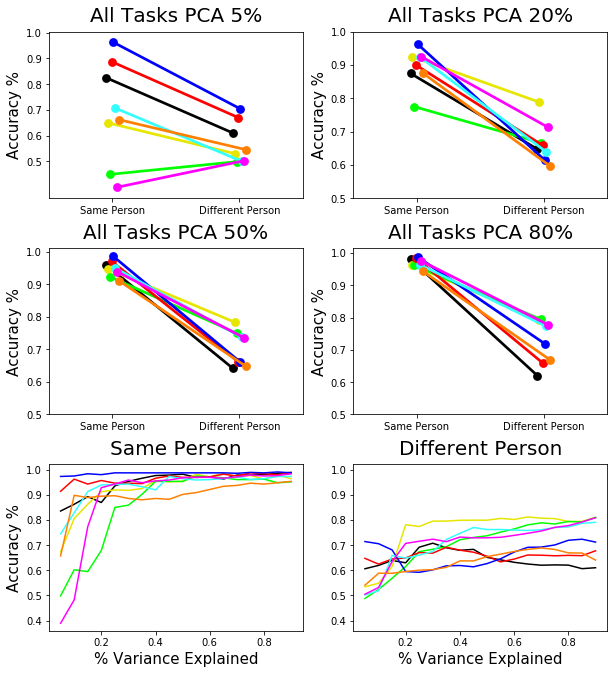

In [160]:
fig=plt.figure(figsize=(10,15), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 2 rows by 2 columns
gs = gridspec.GridSpec(nrows=4, ncols=2,wspace=.2,hspace=.3)
ax1=fig.add_subplot(gs[0,1])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub", ax=ax1,ci=None, data=PCA20, dodge=.1,order=['Same Person','Different Person'],color='r', palette=['1','2','3','4','5','6','7','10'])
y=[.5,.6,.7,.8,.9,1.0]
plt.yticks(y)
plt.ylabel("Accuracy %", fontsize=15)
ax.set_title('All Tasks PCA 20%', fontsize=20, pad=10)
plt.xlabel(' ')
ax.legend_.remove()
#plt.scatter(x=1,y=mL_mean,s=200,color='r',marker="v")
#ax.text(.3,.49, 'Groupwise Approach')

ax2=fig.add_subplot(gs[1,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",ax=ax2,ci=None, data=PCA50, dodge=.1,order=['Same Person','Different Person'],color='r', palette=['1','2','3','4','5','6','7','10'])
ax.legend_.remove()
ax.set_title('All Tasks PCA 50%', fontsize=20, pad=10)
y=[.5,.6,.7,.8,.9,1.0]
plt.yticks(y)
plt.ylabel("Accuracy %", fontsize=15)
plt.xlabel(' ')
#plt.legend(loc='lower left',fontsize='large')

ax3=fig.add_subplot(gs[1,1])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",ax=ax3,ci=None, data=PCAvar80, dodge=.1,order=['Same Person','Different Person'],color='r', palette=['1','2','3','4','5','6','7','10'])
ax.legend_.remove()
ax.set_title('All Tasks PCA 80%', fontsize=20, pad=10)
y=[.5,.6,.7,.8,.9,1.0]
plt.yticks(y)
plt.ylabel("Accuracy %", fontsize=15)
plt.xlabel(' ')

ax5=fig.add_subplot(gs[0,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub", ax=ax5,ci=None, data=PCA05, dodge=.1,order=['Same Person','Different Person'],color='r', palette=['1','2','3','4','5','6','7','10'])
y=[.5,.6,.7,.8,.9,1.0]
plt.yticks(y)
plt.ylabel("Accuracy %", fontsize=15)
ax.set_title('All Tasks PCA 5%', fontsize=20, pad=10)
plt.xlabel(' ')
ax.legend_.remove()



ax6=fig.add_subplot(gs[2,0])
ax = sns.lineplot(x="var", y='cv_acc',hue='train_sub',ci=None,data=PCA_varChange, ax=ax6,color='r',legend=False,palette=['1','2','3','4','5','6','7','10'])
plt.xlabel("% Variance Explained", fontsize=15)
plt.ylabel("Accuracy %", fontsize=15)
ax.set_title('Same Person', fontsize=20, pad=10)

ax7=fig.add_subplot(gs[2,1],sharey=ax6)
ax = sns.lineplot(x="var", y='acc',hue='train_sub',ci=None,data=PCA_varChange, ax=ax7,color='r',legend=False,palette=['1','2','3','4','5','6','7','10'])
plt.xlabel("% Variance Explained", fontsize=15)
plt.ylabel(" ", fontsize=15)
ax.set_title('Different Person', fontsize=20, pad=10)
plt.savefig(thisDir+'output/FigsFinal/pca_indNet_compPlot.png', bbox_inches='tight')



In [2]:
import pandas as pd
import numpy as np
import os
import sys
sys.path.insert(1, '/Users/Alexis/Desktop/MSC_Alexis/analysis/code/mL_rsfMRI/Predictions')
import reshape
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import colors as mcolors
import seaborn as sns
%matplotlib inline
thisDir = os.path.expanduser('~/Desktop/MSC_Alexis/analysis/')
Parcel_params = reshape.loadParcelParams('Gordon333',thisDir+'data/Parcel_info/')
roi_sort = np.squeeze(Parcel_params['roi_sort'])

net2net=pd.read_csv(thisDir+'output/results/acc/ALL/Net2Net_acc.csv')
subnet=pd.read_csv(thisDir+'output/results/acc/ALL/subNetwork_acc.csv')
finalNet=pd.concat([net2net, subnet])
finalNet.drop(columns={'Unnamed: 0'},inplace=True)




#Lets average all subs 
sameSub=finalNet[(finalNet['Analysis']=='Same Subject')]
diffSub=finalNet[(finalNet['Analysis']=='Different Subject')]
sameSub_all=sameSub.groupby(['Network_A','Network_B']).mean().reset_index()
diffSub_all=diffSub.groupby(['Network_A','Network_B']).mean().reset_index()

sameSub_all_pivot=sameSub_all.pivot(index='Network_A',columns='Network_B',values='acc')
sameSub_all_pivot=sameSub_all_pivot.reindex(['unassign','default','visual','fp','dan','van','salience','co','sm','sm-lat','auditory','pmn','pon'])
sameSub_all_pivot=sameSub_all_pivot.reset_index()
sameSub_all_pivot=sameSub_all_pivot[['Network_A','unassign','default','visual','fp','dan','van','salience','co','sm','sm-lat','auditory','pmn','pon']]
sameSub_all_pivot.set_index('Network_A',inplace=True)

diffSub_all_pivot=diffSub_all.pivot(index='Network_A',columns='Network_B',values='acc')
diffSub_all_pivot=diffSub_all_pivot.reindex(['unassign','default','visual','fp','dan','van','salience','co','sm','sm-lat','auditory','pmn','pon'])
diffSub_all_pivot=diffSub_all_pivot.reset_index()
diffSub_all_pivot=diffSub_all_pivot[['Network_A','unassign','default','visual','fp','dan','van','salience','co','sm','sm-lat','auditory','pmn','pon']]
diffSub_all_pivot.set_index('Network_A',inplace=True)


CVnet2net=pd.read_csv(thisDir+'output/results/acc/CV/subNetwork_acc.csv')
CVnet2net.drop(columns={'Unnamed: 0'},inplace=True)


In [7]:
import seaborn as sns
SS=sameSub.groupby(['Network_A','Network_B']).mean()
SS.reset_index(inplace=True)
OS=diffSub.groupby(['Network_A','Network_B']).mean()
OS.reset_index(inplace=True)

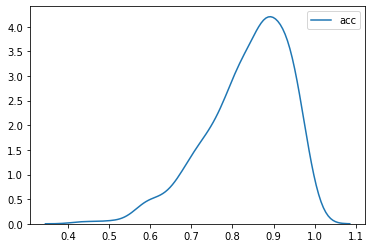

In [8]:
sns.kdeplot(sameSub['acc']) #each subjects heatmaps

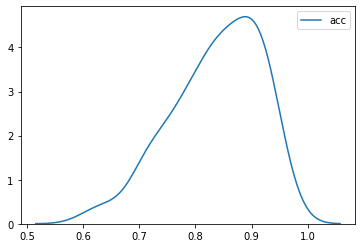

In [9]:
sns.kdeplot(SS['acc']) #mean heatmap

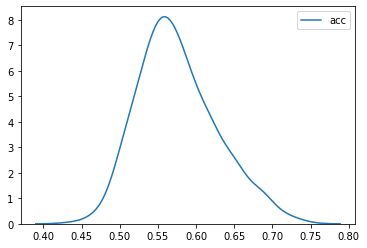

In [10]:
sns.kdeplot(diffSub['acc'])

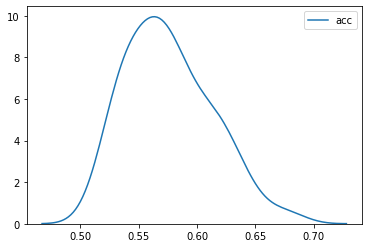

In [11]:
sns.kdeplot(OS['acc']) #mean

In [17]:
diffSub[diffSub['acc']<.5].count()

train_sub    35
Analysis     35
acc          35
Network_A    35
Network_B    35
dtype: int64

In [18]:
sameSub[sameSub['acc']<.5].count()

train_sub    3
Analysis     3
acc          3
Network_A    3
Network_B    3
dtype: int64

In [24]:
diff=sameSub.merge(diffSub, how='left', on=['train_sub','Network_A','Network_B'])
diff['kept']=diff['acc_x']-diff['acc_y']

In [38]:
OS=diffSub.groupby(['Network_A','Network_B']).mean()
OS.reset_index(inplace=True)
diffSub[diffSub['acc']>.6].count()


train_sub    207
Analysis     207
acc          207
Network_A    207
Network_B    207
dtype: int64

In [58]:
same=net2net[net2net['Analysis']=='Different Subject']
same.drop(columns=['Unnamed: 0'],inplace=True)
same=same.groupby(['Network_A','Network_B']).mean()
same.reset_index(inplace=True)
same.sort_values(by='acc')

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Network_A,Network_B,acc
6,pon,pon,0.523017
0,auditory,auditory,0.536325
5,pmn,pmn,0.537020
7,salience,salience,0.541707
10,unassign,unassign,0.548850
2,dan,dan,0.551927
4,fp,fp,0.561841
1,co,co,0.574972
11,van,van,0.577272
9,sm-lat,sm-lat,0.590825


In [56]:
same=net2net[net2net['Analysis']=='Same Subject']
same.drop(columns=['Unnamed: 0'],inplace=True)
same=same.groupby(['Network_A','Network_B']).mean()
same.reset_index(inplace=True)
same.sort_values(by='acc')
#same.groupby(['Network_A','Network_B']).max()

,Network_A,Network_B,acc
7,salience,salience,0.642101
6,pon,pon,0.718056
5,pmn,pmn,0.722656
9,sm-lat,sm-lat,0.762240
0,auditory,auditory,0.787196
10,unassign,unassign,0.831120
11,van,van,0.887283
4,fp,fp,0.903646
1,co,co,0.905773
8,sm,sm,0.910894


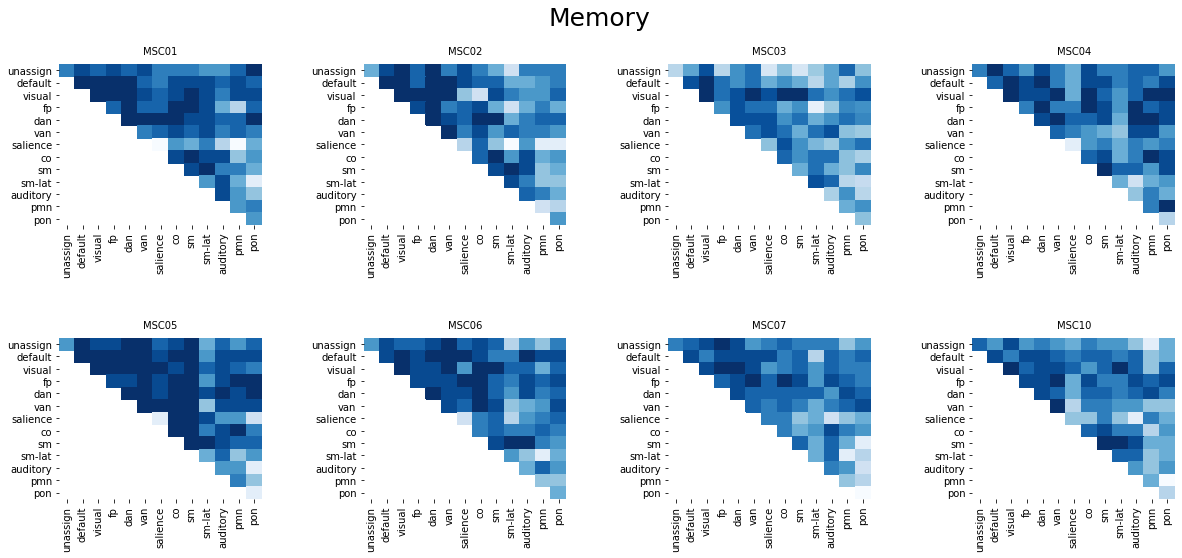

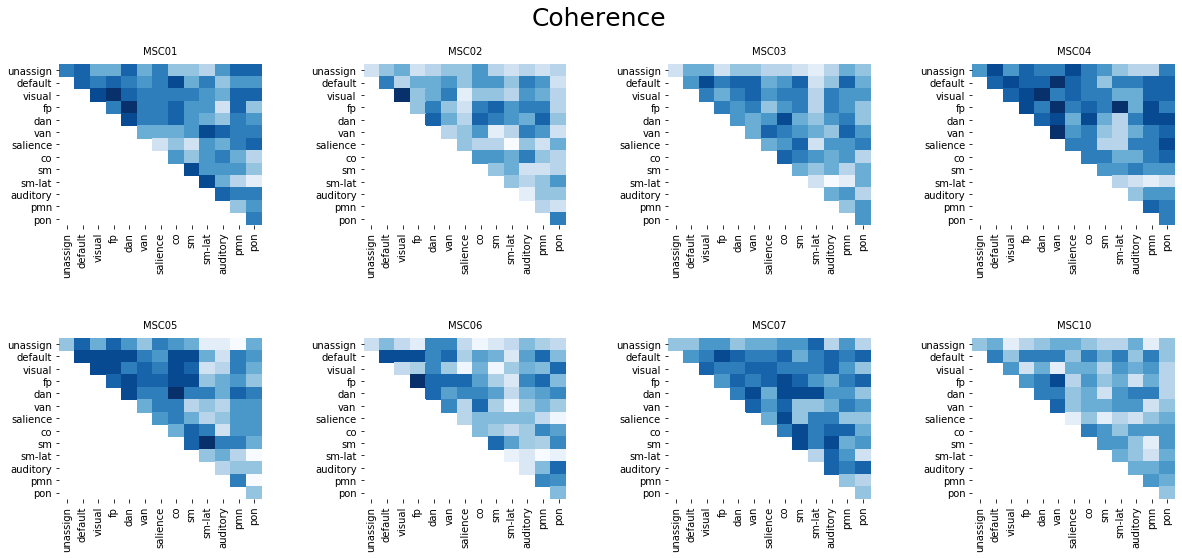

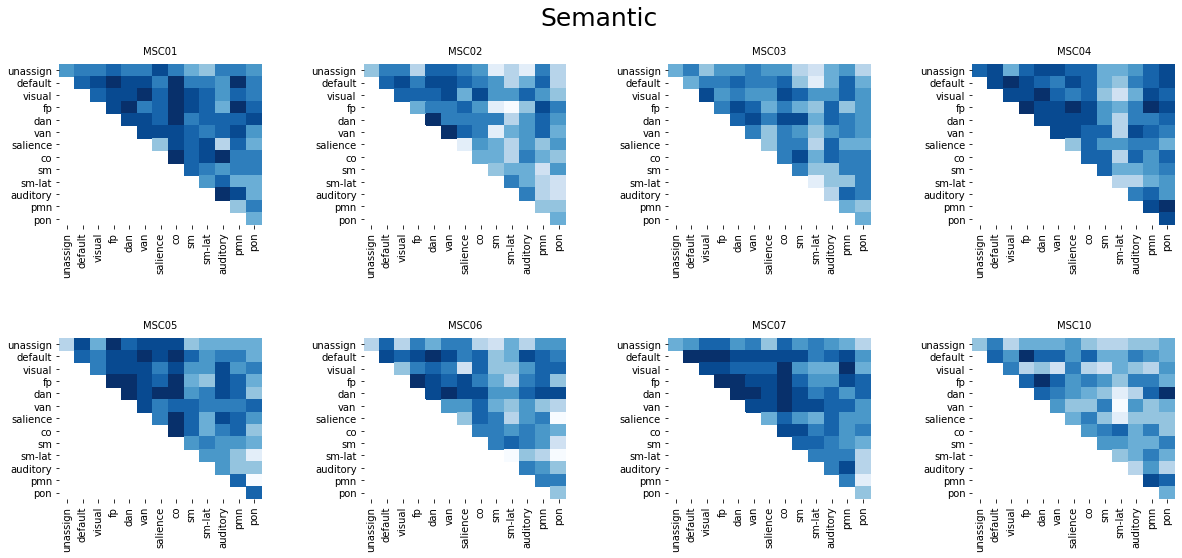

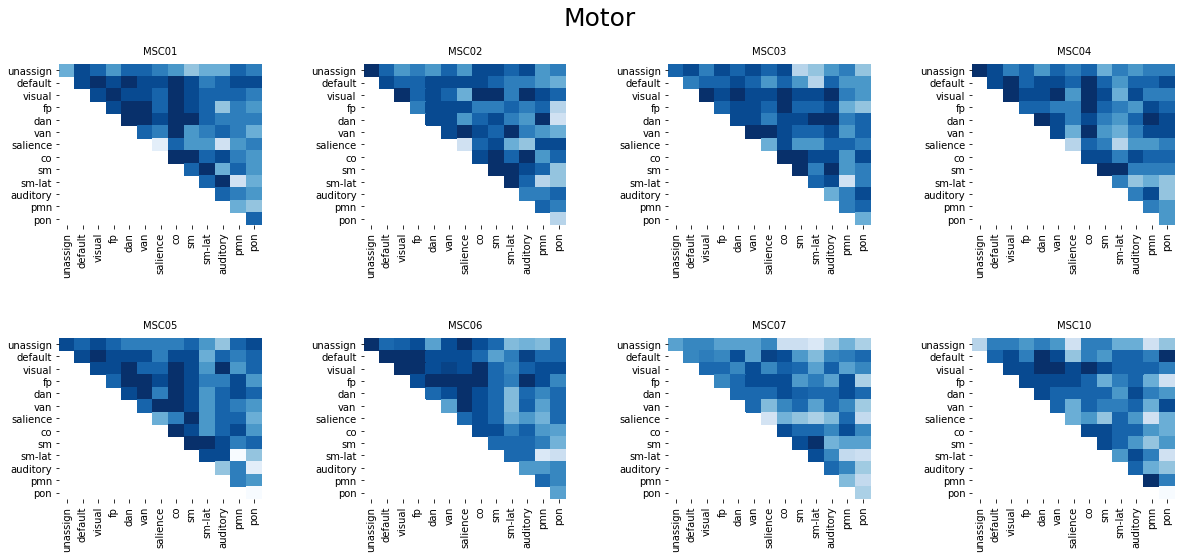

In [51]:
#plot all for same sub 

#fig.text(.46, .89, 'Memory',fontsize=25)
#fig.text(.45, .69, 'Coherence',fontsize=25)
#fig.text(.45, .48, 'Semantic',fontsize=25)
#fig.text(.47, .27, 'Motor',fontsize=25)

#gs = gridspec.GridSpec(nrows=4, ncols=1, hspace=.5)
#fig.suptitle('Same Subject', fontsize=25)
taskDict=dict([('mem','Memory'),('glass','Coherence'),('motor','Motor'),('semantic','Semantic')])
count=0
for j in taskList:
    #gs00 = gs[count].subgridspec(2,4)
    fig=plt.figure(figsize=(20,8))
    gs00= gridspec.GridSpec(nrows=2, ncols=4, wspace=0.5, hspace=0.7)
    position=0
    title=taskDict[j]
    subset=CVnet2net[(CVnet2net['task']==j)]
    fig.suptitle(title, fontsize=25)
    for i in subList:
        tmp=subset[(subset['sub']==i)]
        tmp.drop(columns={'sub','task'},inplace=True)
        tmp_pivot=tmp.pivot(index='Network_A',columns='Network_B',values='acc')
        tmp_pivot=tmp_pivot.reindex(['unassign','default','visual','fp','dan','van','salience','co','sm','sm-lat','auditory','pmn','pon'])
        tmp_pivot=tmp_pivot.reset_index()
        tmp_pivot=tmp_pivot[['Network_A','unassign','default','visual','fp','dan','van','salience','co','sm','sm-lat','auditory','pmn','pon']]
        tmp_pivot.set_index('Network_A',inplace=True)
        if position<4:
            ax1=fig.add_subplot(gs00[0,position])
            ax=sns.heatmap(tmp_pivot,cmap='Blues',vmin=.5,vmax=1,ax=ax1,cbar=False)
            #ax.set_aspect('equal')
            ax.set_title(i,fontsize=10, pad=10)
            ax.set_xlabel('')
            ax.set_ylabel('')
        else:
            spot=position-4
            ax2=fig.add_subplot(gs00[1,spot])
            ax=sns.heatmap(tmp_pivot,cmap='Blues',vmin=.5,vmax=1,ax=ax2,cbar=False)
            #ax.set_aspect('equal')
            ax.set_title(i,fontsize=10, pad=10)
            ax.set_xlabel('')
            ax.set_ylabel('')
        position=position+1
    #count=count+1
        plt.savefig(thisDir+'output/FigsFinal/net2net_'+j+'_Plot.png', bbox_inches='tight')


"\n#ax2=fig.add_subplot(gs[0,1])\nax=sns.heatmap(diffSub_all_pivot,cmap='Blues',vmin=.5,vmax=1)#,ax=ax2)\nax.set_title('Different Person',fontsize=30, pad=10)\nax.set_xlabel('')\nax.set_ylabel('')\nplt.yticks(fontsize=15)\nplt.xticks(fontsize=15)\n"

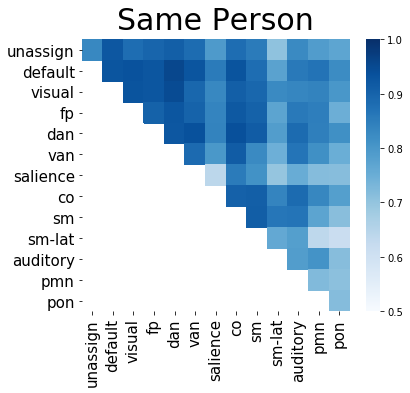

In [12]:
fig=plt.figure(figsize=(6,5))#, constrained_layout=True)
#plt.rcParams['figure.constrained_layout.use'] = True
gs = gridspec.GridSpec(nrows=1, ncols=2, wspace=0.7, hspace=0.0)

#ax1=fig.add_subplot(gs[0,0])
ax=sns.heatmap(sameSub_all_pivot,cmap='Blues',vmin=.5,vmax=1)#,ax=ax1)
ax.set_title('Same Person',fontsize=30, pad=10)
ax.set_xlabel('')
ax.set_ylabel('')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

"""
#ax2=fig.add_subplot(gs[0,1])
ax=sns.heatmap(diffSub_all_pivot,cmap='Blues',vmin=.5,vmax=1)#,ax=ax2)
ax.set_title('Different Person',fontsize=30, pad=10)
ax.set_xlabel('')
ax.set_ylabel('')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
"""
#plt.savefig('/Users/Alexis/Documents/Conferences/CNS2021/SSfeature_plots.png', bbox_inches='tight')

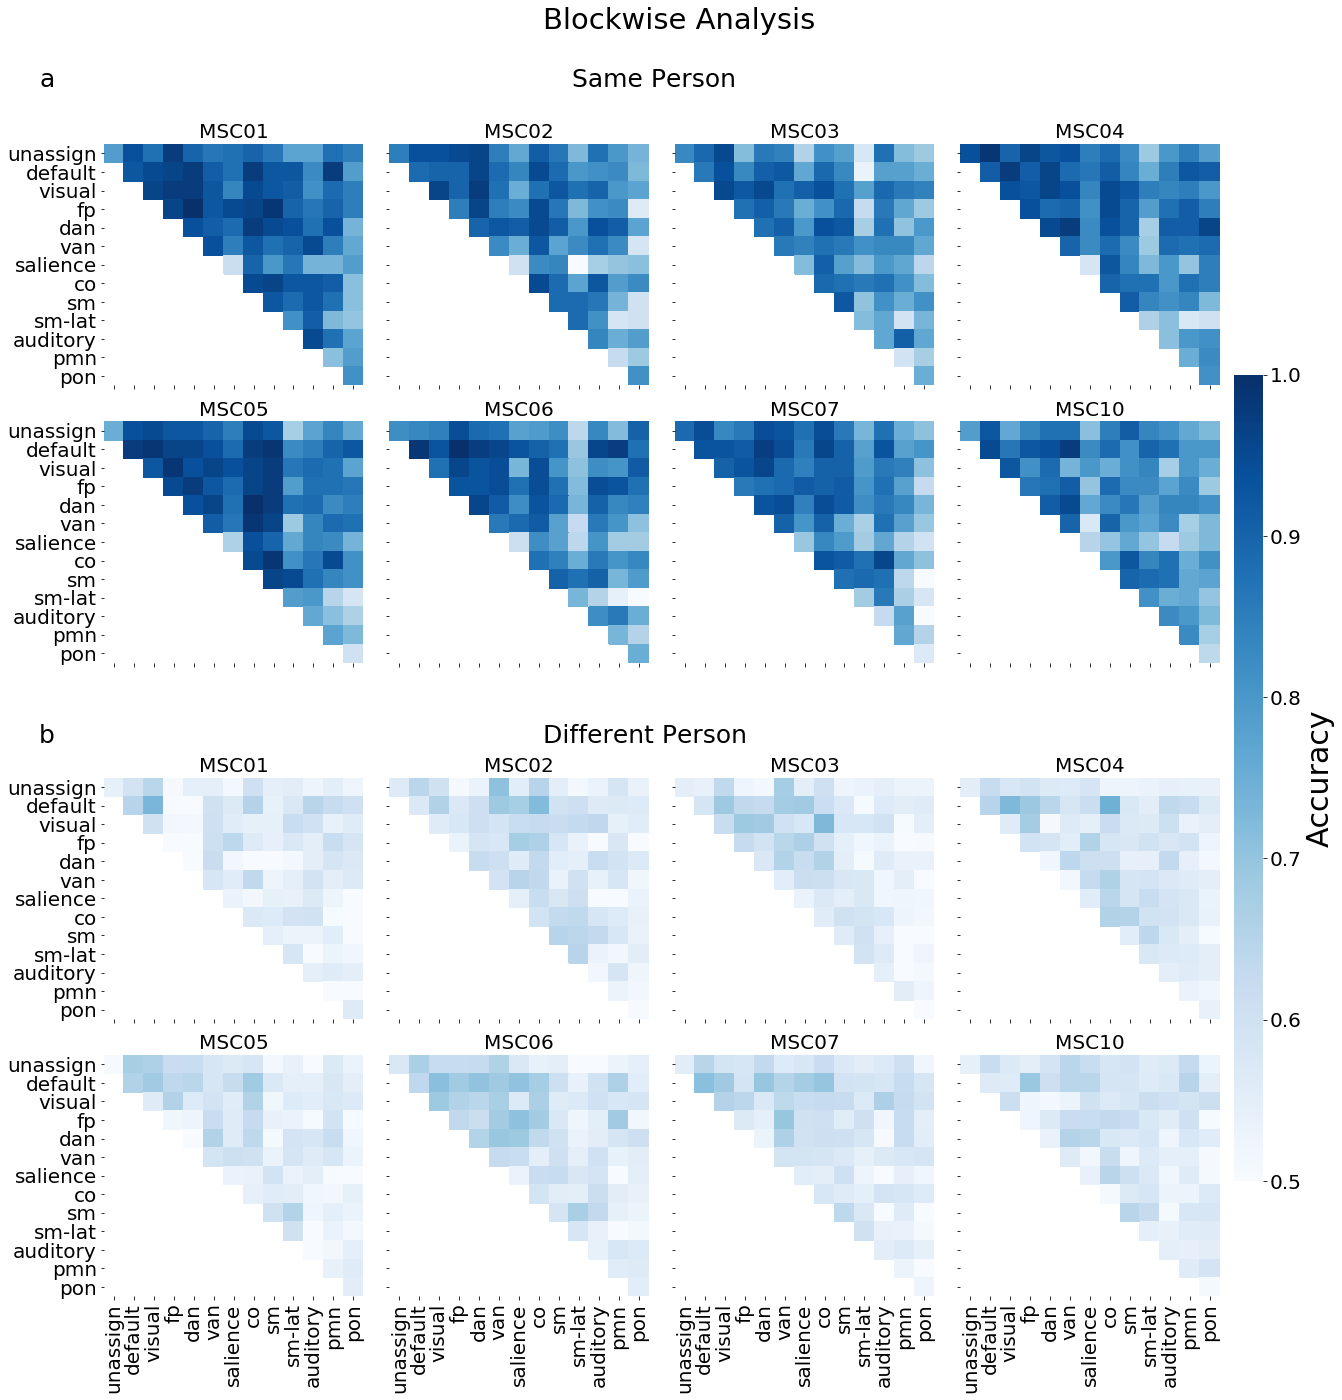

In [13]:
#plot all for same sub 
fig=plt.figure(figsize=(20,16))
fig.text(.08, 1.05, 'a',fontsize=25)
fig.text(.43, 1.1, 'Blockwise Analysis',fontsize=29)
fig.text(.45, 1.05, 'Same Person',fontsize=25)
fig.text(.08, .48, 'b',fontsize=25)
fig.text(.43, .48, 'Different Person',fontsize=25)
cbar_ax = fig.add_axes([.91, .1, .02, .7])
gs00 = fig.add_gridspec(nrows=2, ncols=4,top=1, bottom=.55,wspace=0.1, hspace=0.15)
gs01 = fig.add_gridspec(nrows=2, ncols=4, top=.45, bottom=0,wspace=0.1, hspace=0.15)
position=0
#fig.suptitle('Same Subject', fontsize=25)
for i in subList:
    tmp=sameSub[(sameSub['train_sub']==i)]
    tmp.drop(columns={'train_sub','Analysis'},inplace=True)
    tmp_pivot=tmp.pivot(index='Network_A',columns='Network_B',values='acc')
    tmp_pivot=tmp_pivot.reindex(['unassign','default','visual','fp','dan','van','salience','co','sm','sm-lat','auditory','pmn','pon'])
    tmp_pivot=tmp_pivot.reset_index()
    tmp_pivot=tmp_pivot[['Network_A','unassign','default','visual','fp','dan','van','salience','co','sm','sm-lat','auditory','pmn','pon']]
    tmp_pivot.set_index('Network_A',inplace=True)
    if position<4:
        ax1=fig.add_subplot(gs00[0,position])
        ax=sns.heatmap(tmp_pivot,cmap='Blues',vmin=.5,vmax=1,ax=ax1,cbar=False)
        ax.set_title(i,fontsize=20)
        ax.set_xlabel('')
        ax.set_ylabel('')
        if position==0:
            ax1.tick_params(labelsize=20)
            plt.setp(ax1.get_xticklabels(), visible=False)
        else:
            plt.setp(ax1.get_xticklabels(), visible=False)
            plt.setp(ax1.get_yticklabels(), visible=False)
    else:
        spot=position-4
        ax2=fig.add_subplot(gs00[1,spot])
        ax=sns.heatmap(tmp_pivot,cmap='Blues',vmin=.5,vmax=1,ax=ax2, cbar=False if spot<3 else True,cbar_ax=None if spot<3 else cbar_ax)
        ax.set_title(i,fontsize=20)
        ax.set_xlabel('')
        ax.set_ylabel('')
        if spot==0:
            plt.xticks(rotation=90)
            ax2.tick_params(labelsize=20)
            plt.setp(ax2.get_xticklabels(), visible=False)
        elif spot==3:
            plt.setp(ax2.get_xticklabels(), visible=False)
            plt.setp(ax2.get_yticklabels(), visible=False)
            ax2.tick_params(labelsize=20)
            plt.xticks(rotation=90)  
            ax2.collections[0].colorbar.set_label("Accuracy")
            cbar_ax.yaxis.label.set_size(30)
            cbar = ax2.collections[0].colorbar
            # here set the labelsize by 20
            cbar.ax.tick_params(labelsize=20)
        else:
            plt.setp(ax2.get_xticklabels(), visible=False)
            plt.setp(ax2.get_yticklabels(), visible=False)
            ax2.tick_params(labelsize=20)
            plt.xticks(rotation=90)
    position=position+1
    

position=0
#fig.suptitle('Different Subject', fontsize=25)
for i in subList:
    tmp=diffSub[(diffSub['train_sub']==i)]
    tmp.drop(columns={'train_sub','Analysis'},inplace=True)
    tmp_pivot=tmp.pivot(index='Network_A',columns='Network_B',values='acc')
    tmp_pivot=tmp_pivot.reindex(['unassign','default','visual','fp','dan','van','salience','co','sm','sm-lat','auditory','pmn','pon'])
    tmp_pivot=tmp_pivot.reset_index()
    tmp_pivot=tmp_pivot[['Network_A','unassign','default','visual','fp','dan','van','salience','co','sm','sm-lat','auditory','pmn','pon']]
    tmp_pivot.set_index('Network_A',inplace=True)
    if position<4:
        ax1=fig.add_subplot(gs01[0,position])
        ax=sns.heatmap(tmp_pivot,cmap='Blues',vmin=.5,vmax=1,ax=ax1,cbar=False)
        ax.set_title(i,fontsize=20)
        ax.set_xlabel('')
        ax.set_ylabel('')
        if position==0:
            ax1.tick_params(labelsize=20)
            plt.setp(ax1.get_xticklabels(), visible=False)
        else:
            plt.setp(ax1.get_xticklabels(), visible=False)
            plt.setp(ax1.get_yticklabels(), visible=False)
    else:
        spot=position-4
        ax2=fig.add_subplot(gs01[1,spot])
        ax=sns.heatmap(tmp_pivot,cmap='Blues',vmin=.5,vmax=1,ax=ax2,cbar=False)
        ax.set_title(i,fontsize=20)
        ax.set_xlabel('')
        ax.set_ylabel('')
        if spot==0:
            plt.xticks(rotation=90)
            ax2.tick_params(labelsize=20)
            #plt.setp(ax2.get_xticklabels(), visible=False)
        else:
            plt.setp(ax2.get_yticklabels(), visible=False)
            ax2.tick_params(labelsize=20)
            plt.xticks(rotation=90)
    position=position+1 
#plt.savefig(thisDir+'output/FigsFinal/net2net_wtn_Plot.png', bbox_inches='tight')


In [ ]:
#plot all for same sub 
fig=plt.figure(figsize=(20,8))
gs = gridspec.GridSpec(nrows=2, ncols=4, wspace=0.5, hspace=0.7)
position=0
fig.suptitle('Same Subject', fontsize=25)
for i in subList:
    tmp=sameSub[(sameSub['train_sub']==i)]
    tmp.drop(columns={'train_sub','Analysis'},inplace=True)
    tmp_pivot=tmp.pivot(index='Network_A',columns='Network_B',values='acc')
    tmp_pivot=tmp_pivot.reindex(['unassign','default','visual','fp','dan','van','salience','co','sm','sm-lat','auditory','pmn','pon'])
    tmp_pivot=tmp_pivot.reset_index()
    tmp_pivot=tmp_pivot[['Network_A','unassign','default','visual','fp','dan','van','salience','co','sm','sm-lat','auditory','pmn','pon']]
    tmp_pivot.set_index('Network_A',inplace=True)
    if position<4:
        ax1=fig.add_subplot(gs[0,position])
        ax=sns.heatmap(tmp_pivot,cmap='Blues',vmin=.5,vmax=1,ax=ax1,cbar=False)
        ax.set_title(i,fontsize=10, pad=10)
        ax.set_xlabel('')
        ax.set_ylabel('')
    else:
        spot=position-4
        ax2=fig.add_subplot(gs[1,spot])
        ax=sns.heatmap(tmp_pivot,cmap='Blues',vmin=.5,vmax=1,ax=ax2,cbar=False)
        ax.set_title(i,fontsize=10, pad=10)
        ax.set_xlabel('')
        ax.set_ylabel('')
    position=position+1
    
plt.savefig(thisDir+'output/FigsFinal/net2net_wtn_Plot.png', bbox_inches='tight')


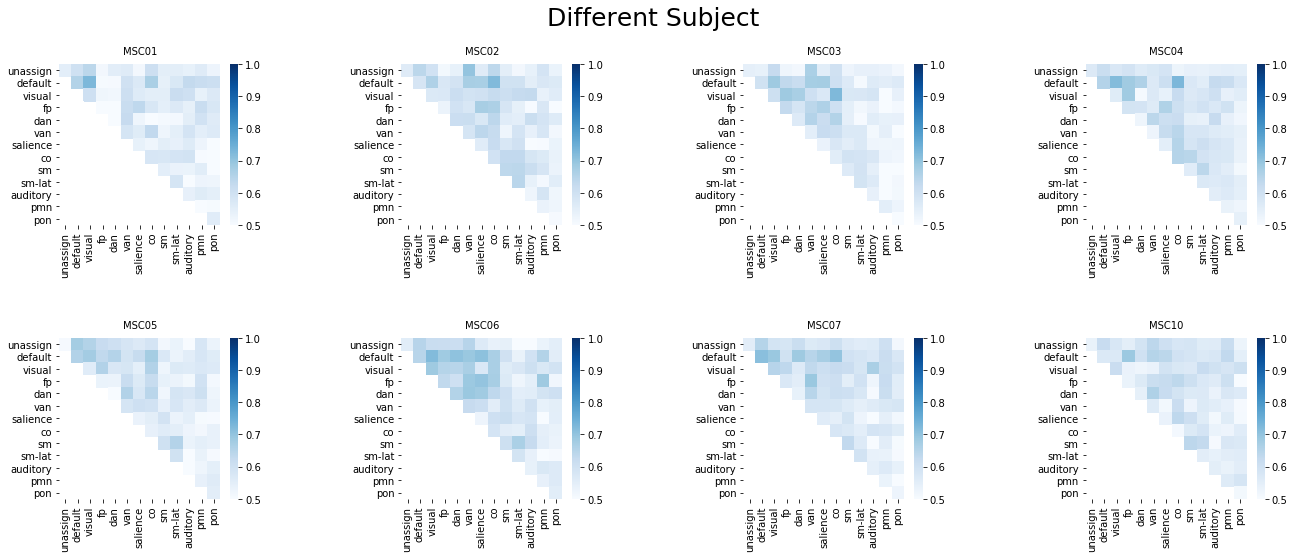

In [333]:
#plot all for diff sub 
fig=plt.figure(figsize=(22,8))
gs = gridspec.GridSpec(nrows=2, ncols=4, wspace=0.7, hspace=0.7)
position=0
fig.suptitle('Different Subject', fontsize=25)
for i in subList:
    tmp=diffSub[(diffSub['train_sub']==i)]
    tmp.drop(columns={'train_sub','Analysis'},inplace=True)
    tmp_pivot=tmp.pivot(index='Network_A',columns='Network_B',values='acc')
    tmp_pivot=tmp_pivot.reindex(['unassign','default','visual','fp','dan','van','salience','co','sm','sm-lat','auditory','pmn','pon'])
    tmp_pivot=tmp_pivot.reset_index()
    tmp_pivot=tmp_pivot[['Network_A','unassign','default','visual','fp','dan','van','salience','co','sm','sm-lat','auditory','pmn','pon']]
    tmp_pivot.set_index('Network_A',inplace=True)
    if position<4:
        ax1=fig.add_subplot(gs[0,position])
        ax=sns.heatmap(tmp_pivot,cmap='Blues',vmin=.5,vmax=1,ax=ax1)
        ax.set_title(i,fontsize=10, pad=10)
        ax.set_xlabel('')
        ax.set_ylabel('')
    else:
        spot=position-4
        ax2=fig.add_subplot(gs[1,spot])
        ax=sns.heatmap(tmp_pivot,cmap='Blues',vmin=.5,vmax=1,ax=ax2)
        ax.set_title(i,fontsize=10, pad=10)
        ax.set_xlabel('')
        ax.set_ylabel('')
    position=position+1
    
    
plt.savefig(thisDir+'output/FigsFinal/net2net_btw_Plot.png', bbox_inches='tight')


In [201]:
group=pd.read_csv('/Users/Alexis/Desktop/MSC_Alexis/analysis/output/results/acc/ALL/GroupNet/acc.csv')
ind=pd.read_csv('/Users/Alexis/Desktop/MSC_Alexis/analysis/output/results/acc/ALL/IndNet/acc.csv')



df_group=group.groupby(['train_sub']).mean()
df_group.rename(columns={'cv_acc':'Same Person','acc':'Different Person'},inplace=True)
df_group.reset_index(inplace=True)
group=pd.melt(df_group, id_vars=['train_sub'], value_vars=['Same Person','Different Person'],var_name='Analysis',value_name='acc')


df_ind=ind.groupby(['train_sub']).mean()
df_ind.rename(columns={'cv_acc':'Same Subject','acc':'Different Person'},inplace=True)
df_ind.reset_index(inplace=True)
ind=pd.melt(df_ind, id_vars=['train_sub'], value_vars=['Same Person','Different Person'],var_name='Analysis',value_name='acc')


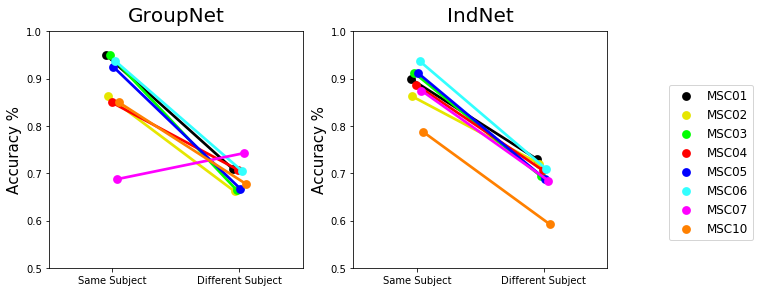

In [202]:
fig=plt.figure(figsize=(10,10), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 2 rows by 2 columns
gs = gridspec.GridSpec(nrows=2, ncols=2,wspace=.2,hspace=.3)
ax1=fig.add_subplot(gs[0,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub", ax=ax1,ci=None, data=group, dodge=.1,order=['Same Person','Different Person'],color='r', palette=['1','2','3','4','5','6','7','10'])
y=[.5,.6,.7,.8,.9,1.0]
plt.yticks(y)
plt.ylabel("Accuracy %", fontsize=15)
ax.set_title('Group Parcellation', fontsize=15, pad=10)
plt.xlabel(' ')
ax.legend_.remove()

ax2=fig.add_subplot(gs[0,1])
ax=sns.pointplot(x="Analysis",y="acc", hue="train_sub",ax=ax2,ci=None, data=ind, dodge=.1,order=['Same Person','Different Person'],color='r', palette=['1','2','3','4','5','6','7','10'])
ax.set_title('Individual Parcellation', fontsize=15, pad=10)
y=[.5,.6,.7,.8,.9,1.0]
plt.yticks(y)
plt.ylabel(" ", fontsize=15)
plt.xlabel(' ')
plt.legend(bbox_to_anchor=(1.6, .8),loc='upper right',fontsize='large')
plt.savefig(thisDir+'output/FigsFinal/indGroupNet_Plot.png', bbox_inches='tight')

In [165]:



SSdfFinal=pd.read_csv(thisDir+'output/results/permutation/ALL/shuffle_ROIacc.csv')


null=pd.read_csv(thisDir+'output/results/permutation/ALL/null_ROIacc.csv')



In [166]:
MSC01=SSdfFinal[SSdfFinal['train']=='MSC01']
MSC02=SSdfFinal[SSdfFinal['train']=='MSC02']
MSC03=SSdfFinal[SSdfFinal['train']=='MSC03']
MSC04=SSdfFinal[SSdfFinal['train']=='MSC04']
MSC05=SSdfFinal[SSdfFinal['train']=='MSC05']
MSC06=SSdfFinal[SSdfFinal['train']=='MSC06']
MSC07=SSdfFinal[SSdfFinal['train']=='MSC07']
MSC10=SSdfFinal[SSdfFinal['train']=='MSC10']

MSC01_null=null[null['train']=='MSC01']
MSC02_null=null[null['train']=='MSC02']
MSC03_null=null[null['train']=='MSC03']
MSC04_null=null[null['train']=='MSC04']
MSC05_null=null[null['train']=='MSC05']
MSC06_null=null[null['train']=='MSC06']
MSC07_null=null[null['train']=='MSC07']
MSC10_null=null[null['train']=='MSC10']

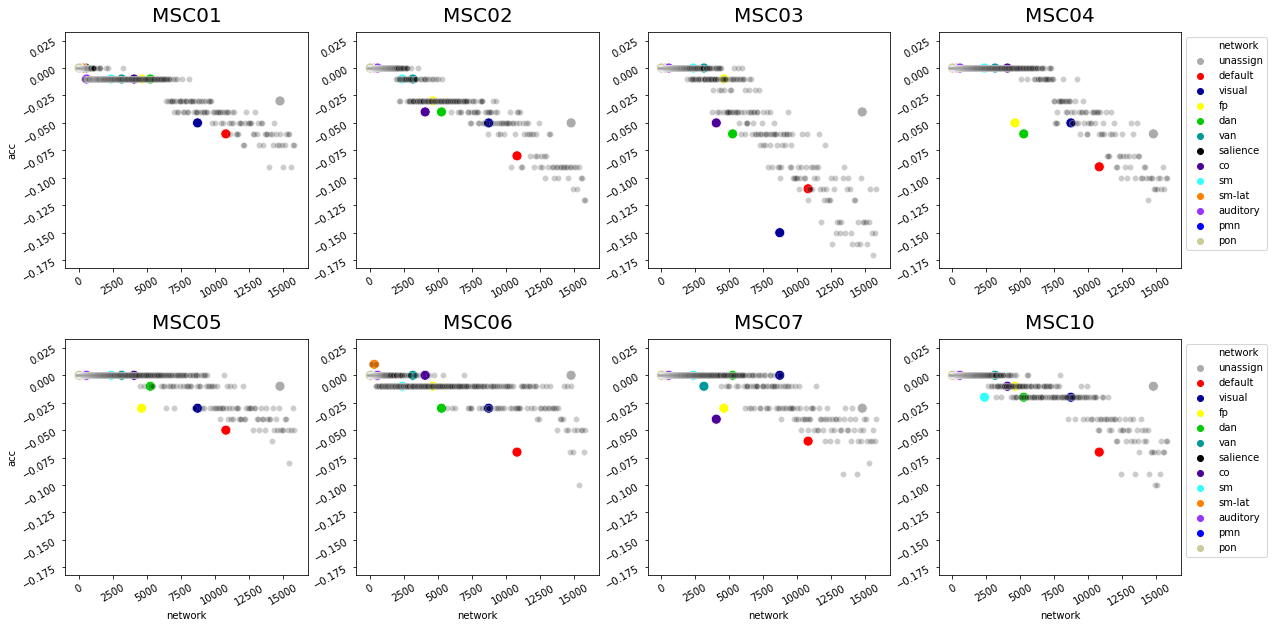

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(20,10), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 2 rows by 2 columns
gs = gridspec.GridSpec(nrows=2, ncols=4,wspace=.2,hspace=.3)
ax0=fig.add_subplot(gs[0,0])
ax=sns.scatterplot(x='feature', y='acc', hue='network', data=MSC01,ax=ax0, s=100, color='r', palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
g=sns.scatterplot(x='network', y='acc',alpha=.2, data=MSC01_null,color='black',ax=ax0)
ax.tick_params(labelsize=10,rotation=30)
ax.legend_.remove()
#ax.axhline(0, ls='--')
ax.set_title('MSC01', fontsize=20, pad=10)
plt.xlabel(' ')
ax1=fig.add_subplot(gs[0,1],sharey=ax0)
ax=sns.scatterplot(x='feature', y='acc', hue='network', data=MSC02,ax=ax1, s=100, color='r', palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
g=sns.scatterplot(x='network', y='acc', data=MSC02_null,color='black',alpha=.2,ax=ax1)
ax.tick_params(labelsize=10,rotation=30)
ax.legend_.remove()
#ax.axhline(0, ls='--')
ax.set_title('MSC02', fontsize=20, pad=10)
plt.xlabel(' ')
plt.ylabel(' ')
ax2=fig.add_subplot(gs[0,2],sharey=ax0)
ax=sns.scatterplot(x='feature', y='acc', hue='network', data=MSC03,ax=ax2, s=100, color='r', palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
g=sns.scatterplot(x='network', y='acc', data=MSC03_null,color='black',alpha=.2,ax=ax2)
ax.tick_params(labelsize=10,rotation=30)
ax.legend_.remove()
#ax.axhline(0, ls='--')
ax.set_title('MSC03', fontsize=20, pad=10)
plt.ylabel(' ')
plt.xlabel(' ')
ax3=fig.add_subplot(gs[0,3],sharey=ax0)
ax=sns.scatterplot(x='feature', y='acc', hue='network', data=MSC04,ax=ax3, s=100, color='r', palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
g=sns.scatterplot(x='network', y='acc', data=MSC04_null,color='black',alpha=.2,ax=ax3)
ax.tick_params(labelsize=10,rotation=30)
plt.legend(bbox_to_anchor=(1, 1.0))
ax.set_title('MSC04', fontsize=20, pad=10)
plt.ylabel(' ')
plt.xlabel(' ')

ax4=fig.add_subplot(gs[1,0],sharey=ax0)
ax=sns.scatterplot(x='feature', y='acc', hue='network', data=MSC05,ax=ax4, s=100, color='r', palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
g=sns.scatterplot(x='network', y='acc', data=MSC05_null,color='black',alpha=.2,ax=ax4)
ax.tick_params(labelsize=10,rotation=30)
ax.legend_.remove()
ax.set_title('MSC05', fontsize=20, pad=10)

ax5=fig.add_subplot(gs[1,1],sharey=ax0)
ax=sns.scatterplot(x='feature', y='acc', hue='network', data=MSC06,ax=ax5, s=100, color='r', palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
g=sns.scatterplot(x='network', y='acc', data=MSC06_null,color='black',alpha=.2,ax=ax5)
ax.tick_params(labelsize=10,rotation=30)
ax.legend_.remove()
ax.set_title('MSC06', fontsize=20, pad=10)
plt.ylabel(' ')
ax6=fig.add_subplot(gs[1,2],sharey=ax0)
ax=sns.scatterplot(x='feature', y='acc', hue='network', data=MSC07,ax=ax6, s=100, color='r', palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
g=sns.scatterplot(x='network', y='acc', data=MSC07_null,color='black',alpha=.2,ax=ax6)
ax.tick_params(labelsize=10,rotation=30)
ax.legend_.remove()
ax.set_title('MSC07', fontsize=20, pad=10)
plt.ylabel(' ')


ax7=fig.add_subplot(gs[1,3],sharey=ax0)
ax=sns.scatterplot(x='feature', y='acc', hue='network', data=MSC10,ax=ax7, s=100, color='r', palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
g=sns.scatterplot(x='network', y='acc', data=MSC10_null,color='black',alpha=.2,ax=ax7)
ax.tick_params(labelsize=10,rotation=30)
plt.legend(bbox_to_anchor=(1, 1.0))
ax.set_title('MSC10', fontsize=20, pad=10)
plt.ylabel(' ')
plt.savefig(thisDir+'output/FigsFinal/permNets_hue_Plot.png', bbox_inches='tight')

In [103]:
rand_DS=pd.read_csv(randDir+'DS/acc.csv')

rand_SS=pd.read_csv(randDir+'SS/acc.csv')

rand_BS=pd.read_csv(randDir+'BS/acc.csv')

rand_CV=pd.read_csv(randDir+'CV/acc.csv')

rand_ALL=pd.read_csv(randDir+'ALL/acc.csv')
def p5(x):
    return np.percentile(x,5)

# 90th Percentile
def p95(x):
    return np.percentile(x,95)

percentiles_CV=rand_DS.groupby(['feature','task']).agg({'same_sub': [p5, p95]})
percentiles_CV.columns = percentiles_CV.columns.droplevel()
percentiles_CV.reset_index(inplace=True)

percentiles_DS=rand_DS.groupby(['feature','task']).agg({'diff_sub': [p5, p95]})
percentiles_DS.columns = percentiles_DS.columns.droplevel()
percentiles_DS.reset_index(inplace=True)


percentiles_SS=rand_SS.groupby(['feature','task']).agg({'diff': [p5, p95]})
percentiles_SS.columns = percentiles_SS.columns.droplevel()
percentiles_SS.reset_index(inplace=True)
"""
percentiles_BS=rand_BS.groupby(['feature','task']).agg({'diff_sub': [p5, p95]})
percentiles_BS.columns = percentiles_BS.columns.droplevel()
percentiles_BS.reset_index(inplace=True)
"""

"\npercentiles_BS=rand_BS.groupby(['feature','task']).agg({'diff_sub': [p5, p95]})\npercentiles_BS.columns = percentiles_BS.columns.droplevel()\npercentiles_BS.reset_index(inplace=True)\n"

'\n#BS\nax4=fig.add_subplot(gs[1,1])\nax = sns.lineplot(x="feature", y=\'diff_sub\',hue=\'task\',ci=None,data=rand_BS, ax=ax4)\n#ax.fill_between(percentiles_BS[\'round\'],percentiles_BS[\'p5\'],percentiles_BS[\'p95\'],alpha=.2)\nax.set(xscale="log")\n#g=sns.scatterplot(x=\'feature\', y=\'acc\', hue=\'network\', data=BS_z, ax=ax4, color=\'r\',s=100,legend=False,palette=["unassign","default", "visual",\'fp\',\'dan\',\'van\',\'salience\',\'co\',\'sm\',\'sm-lat\', \'auditory\',\'pmn\',\'pon\'])\nax.set_title(\'Different Person Different Task\',fontsize=10, pad=10)\nax.set_ylabel(\'\')\nplt.xlabel(\'Feature Size\')\nax.set(ylim=(.5, 1.05),xlim=(10,50000))\n#ax.tick_params(labelsize=25,pad=15)\nax.legend_.remove()\n'

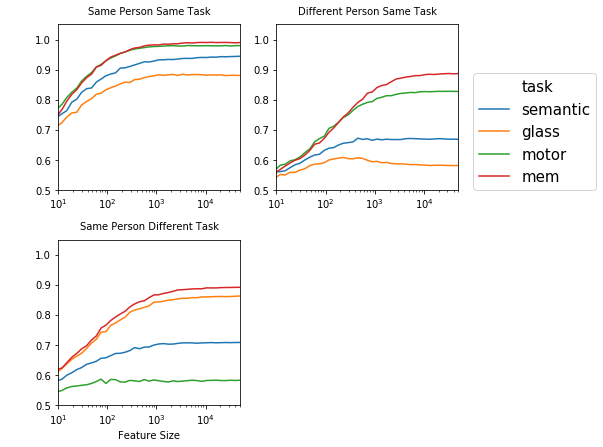

In [104]:
#Feature selection compared to null (Fig 5)
fig=plt.figure(figsize=(15,7), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 2 rows by 2 columns
gs = gridspec.GridSpec(nrows=2, ncols=4, wspace=.2, hspace=.3)
#CV
ax1=fig.add_subplot(gs[0,0])
ax = sns.lineplot(x="feature", y='same_sub',hue='task',ci=None,data=rand_DS, ax=ax1)
#ax.fill_between(percentiles_CV['round'],percentiles_CV['p5'],percentiles_CV['p95'],alpha=.2)
ax.set(xscale="log")

#CV_z.rename(columns={'network':'Network'},inplace=True)
#g=sns.scatterplot(x='feature', y='acc', hue='Network', data=CV_z, ax=ax1, color='r',s=100,palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
ax.set_title('Same Person Same Task',fontsize=10, pad=10)
ax.set_ylabel(" ", fontsize=25)
ax.set_xlabel('')
ax.set(ylim=(.5, 1.05),xlim=(10,50000))
#ax.tick_params(labelsize=25,pad=15)
plt.legend(title=None,markerscale=1, bbox_to_anchor=(3, .75),fontsize=15)
#DS
ax2=fig.add_subplot(gs[0,1])
ax = sns.lineplot(x="feature", y='diff_sub',hue='task',ci=None,data=rand_DS, ax=ax2)
#ax.fill_between(percentiles_DS['round'],percentiles_DS['p5'],percentiles_DS['p95'],alpha=.2)
ax.set(xscale="log")
#g=sns.scatterplot(x='feature', y='acc', hue='network', data=DS_z, ax=ax2, color='r',legend=False,s=100,palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
ax.set_title('Different Person Same Task',fontsize=10, pad=10)
ax.set_ylabel(" ", fontsize=25)
plt.xlabel('',fontsize=25)
ax.set(ylim=(.5, 1.05),xlim=(10,50000))
#ax.tick_params(labelsize=25,pad=15)
ax.legend_.remove()
#SS
ax3=fig.add_subplot(gs[1,0])
ax = sns.lineplot(x="feature", y='diff',hue='task',data=rand_SS, ax=ax3)
#ax.fill_between(percentiles_SS['round'],percentiles_SS['p5'],percentiles_SS['p95'],alpha=.2)
ax.set(xscale="log")
#g=sns.scatterplot(x='feature', y='acc', hue='network', data=SS_z, ax=ax3, color='r',legend=False,s=100,palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
ax.set_title('Same Person Different Task',fontsize=10, pad=10)
ax.set_ylabel('')
plt.xlabel('Feature Size')
ax.set(ylim=(.5, 1.05),xlim=(10,50000))
#ax.tick_params(labelsize=25,pad=15)
ax.legend_.remove()
"""
#BS
ax4=fig.add_subplot(gs[1,1])
ax = sns.lineplot(x="feature", y='diff_sub',hue='task',ci=None,data=rand_BS, ax=ax4)
#ax.fill_between(percentiles_BS['round'],percentiles_BS['p5'],percentiles_BS['p95'],alpha=.2)
ax.set(xscale="log")
#g=sns.scatterplot(x='feature', y='acc', hue='network', data=BS_z, ax=ax4, color='r',s=100,legend=False,palette=["unassign","default", "visual",'fp','dan','van','salience','co','sm','sm-lat', 'auditory','pmn','pon'])
ax.set_title('Different Person Different Task',fontsize=10, pad=10)
ax.set_ylabel('')
plt.xlabel('Feature Size')
ax.set(ylim=(.5, 1.05),xlim=(10,50000))
#ax.tick_params(labelsize=25,pad=15)
ax.legend_.remove()
"""
#plt.savefig(thisDir+'output/FigsFinal/featureTask_Plot.png', bbox_inches='tight')

'\n#BS\nax4=fig.add_subplot(gs[1,2])\nax = sns.lineplot(x="features", y=\'acc\',hue=\'train_sub\',ci=None,data=rand_BS, ax=ax4, color=\'r\', palette=[\'1\',\'2\',\'3\',\'4\',\'5\',\'6\',\'7\',\'10\'])\nax.set(xscale="log")\nax.set_title(\'Different Person Different Task\',fontsize=10, pad=10)\nax.set_ylabel(\'\')\nplt.xlabel(\'Feature Size\')\nax.set(ylim=(.5, 1.05),xlim=(10,50000))\nax.legend_.remove()\n\n\n\n'

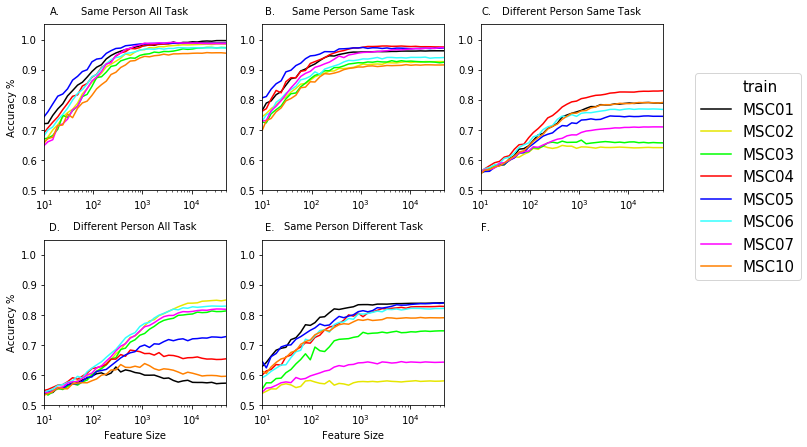

In [105]:
#Feature selection compared to null (Fig 5)
fig=plt.figure(figsize=(15,7), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 2 rows by 2 columns
gs = gridspec.GridSpec(nrows=2, ncols=4, wspace=.2, hspace=.3)
fig.text(.13, .9, 'A.',fontsize=10)
fig.text(.33, .9, 'B.',fontsize=10)
fig.text(.53, .9, 'C.',fontsize=10)
fig.text(.13, .472, 'D.',fontsize=10)
fig.text(.33, .472, 'E.',fontsize=10)
fig.text(.53, .472, 'F.',fontsize=10)
#ALL
ax0=fig.add_subplot(gs[0,0])
ax = sns.lineplot(x="feature", y='same_sub',hue='train',data=rand_ALL, ci=None, ax=ax0, color='r', palette=['1','2','3','4','5','6','7','10'])
ax.set(xscale="log")
plt.xlabel('')
ax.set_ylabel("Accuracy %")
ax.set(ylim=(.5, 1.05),xlim=(10,50000))
ax.set_title('Same Person All Task',fontsize=10, pad=10)
ax.legend_.remove()
ax00=fig.add_subplot(gs[1,0])
ax = sns.lineplot(x="feature", y='diff_sub',hue='train',data=rand_ALL, ci=None,ax=ax00, color='r', palette=['1','2','3','4','5','6','7','10'])
ax.set_title('Different Person All Task',fontsize=10, pad=10)
ax.set(ylim=(.5, 1.05),xlim=(10,50000))
ax.set_ylabel("Accuracy %")
ax.set(xscale="log")
plt.xlabel('Feature Size')
ax.legend_.remove()
#CV
ax1=fig.add_subplot(gs[0,1])
ax = sns.lineplot(x="feature", y='same_sub',hue='train',ci=None,data=rand_DS, ax=ax1, color='r', palette=['1','2','3','4','5','6','7','10'])
ax.set(xscale="log")
ax.set_title('Same Person Same Task',fontsize=10, pad=10)
ax.set_ylabel(" ", fontsize=25)
ax.set_xlabel('')
ax.set(ylim=(.5, 1.05),xlim=(10,50000))
plt.legend(title=None,markerscale=1, bbox_to_anchor=(3, .75),fontsize=15)
#DS
ax2=fig.add_subplot(gs[0,2])
ax = sns.lineplot(x="feature", y='diff_sub',hue='train',ci=None,data=rand_DS, ax=ax2, color='r', palette=['1','2','3','4','5','6','7','10'])
ax.set(xscale="log")
ax.set_title('Different Person Same Task',fontsize=10, pad=10)
ax.set_ylabel(" ", fontsize=25)
plt.xlabel('',fontsize=25)
ax.set(ylim=(.5, 1.05),xlim=(10,50000))
ax.legend_.remove()

#SS
ax3=fig.add_subplot(gs[1,1])
ax = sns.lineplot(x="feature", y='diff',hue='train',ci=None,data=rand_SS, ax=ax3, color='r', palette=['1','2','3','4','5','6','7','10'])
ax.set(xscale="log")
ax.set_title('Same Person Different Task',fontsize=10, pad=10)
ax.set_ylabel('')
plt.xlabel('Feature Size')
ax.set(ylim=(.5, 1.05),xlim=(10,50000))
ax.legend_.remove()
"""
#BS
ax4=fig.add_subplot(gs[1,2])
ax = sns.lineplot(x="features", y='acc',hue='train_sub',ci=None,data=rand_BS, ax=ax4, color='r', palette=['1','2','3','4','5','6','7','10'])
ax.set(xscale="log")
ax.set_title('Different Person Different Task',fontsize=10, pad=10)
ax.set_ylabel('')
plt.xlabel('Feature Size')
ax.set(ylim=(.5, 1.05),xlim=(10,50000))
ax.legend_.remove()



"""
#plt.savefig(thisDir+'output/FigsFinal/featuresub_Plot.png', bbox_inches='tight')





In [92]:
rand_ALL

,train,same_sub,diff_sub,feat
0,MSC01,0.60,0.51,10
1,MSC02,0.68,0.47,10
2,MSC03,0.66,0.54,10
3,MSC04,0.69,0.47,10
4,MSC05,0.81,0.52,10
...,...,...,...,...
7995,MSC04,0.97,0.64,50118
7996,MSC05,0.99,0.70,50118
7997,MSC06,0.96,0.82,50118
7998,MSC07,0.99,0.82,50118


In [34]:
#SVM_outDir = thisDir + 'output/results/SVM/acc/'
#allres=pd.read_csv(outDir+'ALL/separate_acc.csv')
#DS=pd.read_csv(outDir+'DS/separate_acc.csv')
#SVM_SS=pd.read_csv(SVM_outDir+'SS/separate_acc.csv')
#Ridge_SS=pd.read_csv(outDir+'SS/separate_acc.csv')

#BS=pd.read_csv(outDir+'BS/separate_acc.csv')
SS_broken=pd.read_csv(outDir+'SS/separate_broken_acc.csv')
SS_condensed=SS_broken[['train_task','sub','Same Task','Different Task']]


SS_final=pd.melt(SS_condensed, id_vars=['sub','train_task'], value_vars=['Different Task', 'Same Task'],var_name='Analysis', value_name='acc')
#SS_broken.drop(columns=['Different Rest','Same Rest'],inplace=True)
#SS_broken=pd.melt(SS_broken, id_vars=['train','train_task'], value_vars=['Different Task', 'Same Task'],var_name='Analysis', value_name='acc')

#SS_inverse=pd.read_csv(outDir+'SS/allTrain_acc.csv')

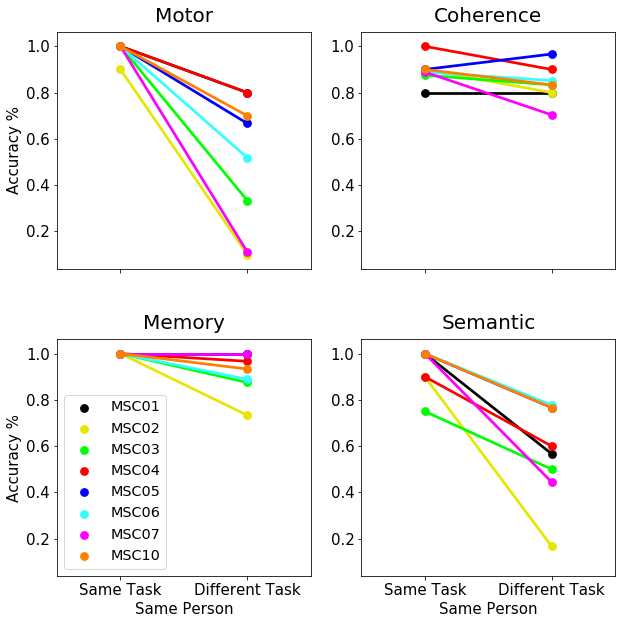

In [38]:

#Comparing same train same task v diff task (Fig 2)
fig=plt.figure(figsize=(10,10), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
gs = gridspec.GridSpec(nrows=2, ncols=2,wspace=.2,hspace=.3)
#Broad overview of changing from same task to diff task
#All Glass


ax1=fig.add_subplot(gs[0,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same Task','Different Task'],ci=None, data=SS_final[SS_final['train_task']=='motor'], ax=ax1)
ax.set_title('Motor',fontsize=20, pad=10)
ax.set(xlabel='')
plt.ylabel('Accuracy %',fontsize=15)

ax.legend_.remove()
position=(0,1)
labels=("Same Task","Different Task")
plt.xticks(position,labels)
plt.setp(ax1.get_xticklabels(), visible=False)
ax.tick_params(labelsize=15)
#All Memory
ax2=fig.add_subplot(gs[0,1],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same Task','Different Task'],ci=None, data=SS_final[SS_final['train_task']=='glass'], ax=ax2)
ax.set_title('Coherence',fontsize=20, pad=10)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()

position=(0,1)
labels=("Same Task","Different Task")
plt.xticks(position,labels)
plt.setp(ax2.get_xticklabels(), visible=False)
ax.tick_params(labelsize=15)
#all Motor
ax3=fig.add_subplot(gs[1,0],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same Task','Different Task'],ci=None, data=SS_final[SS_final['train_task']=='mem'], ax=ax3)
ax.set_title('Memory',fontsize=20, pad=10)
plt.xlabel('Same Person',fontsize=15)
plt.ylabel('Accuracy %',fontsize=15)
ax.legend_.remove()
position=(0,1)
labels=("Same Task","Different Task")
plt.xticks(position,labels)
plt.legend(loc='lower left',fontsize='x-large')
ax.tick_params(labelsize=15)

#all semantic
ax4=fig.add_subplot(gs[1,1],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same Task','Different Task'],ci=None, data=SS_final[SS_final['train_task']=='semantic'],ax=ax4)
ax.set_title('Semantic',fontsize=20, pad=10)
plt.xlabel('Same Person', fontsize=15)
ax.set(ylabel='')
position=(0,1)
labels=("Same Task","Different Task")
plt.xticks(position,labels)
ax.legend_.remove()
ax.tick_params(labelsize=15)

plt.savefig(thisDir+'output/FigsFinal/SS_TaskONLY_plots.png', bbox_inches='tight')

In [29]:
SS_broken

,train_task,test_task,sub,Same Task,Different Task,Same Rest,Different Rest
0,semantic,glass,MSC01,1.0,0.7,1.0,1.0
1,semantic,motor,MSC01,1.0,0.6,1.0,1.0
2,semantic,mem,MSC01,1.0,0.4,1.0,1.0
3,glass,semantic,MSC01,0.8,0.9,0.8,1.0
4,glass,motor,MSC01,0.8,0.8,0.8,1.0
...,...,...,...,...,...,...,...
91,motor,glass,MSC10,1.0,0.8,1.0,0.9
92,motor,mem,MSC10,1.0,0.8,1.0,1.0
93,mem,semantic,MSC10,1.0,0.9,1.0,0.7
94,mem,glass,MSC10,1.0,0.9,1.0,0.9


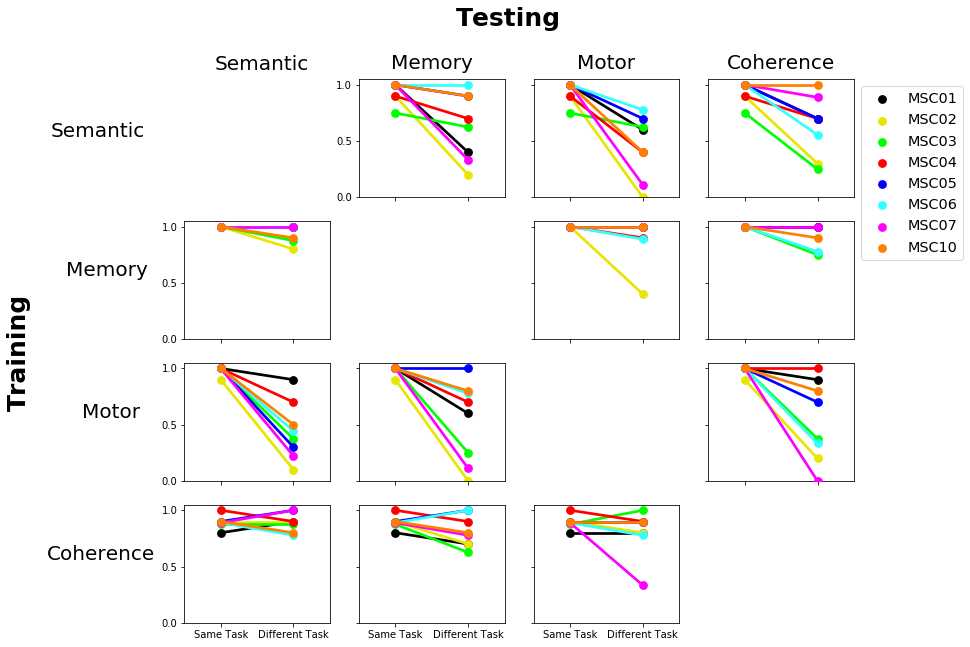

In [28]:
#Fig S4
#DSmBS (Fig 4)
y=[0,.5,1.0]
#train motor test memory 
motTmem=SS_broken[(SS_broken['train_task']=='motor')& (SS_broken['test_task']=='mem')]
motTmem.drop(columns=['train_task','test_task'],inplace=True)
motTmem=motTmem.groupby('sub').mean()
motTmem.reset_index(inplace=True)
motTmem=pd.melt(motTmem, id_vars=['sub'], value_vars=['Different Task', 'Same Task'],var_name='Analysis', value_name='acc')

#train motor test semantic 
motTsem=SS_broken[(SS_broken['train_task']=='motor')& (SS_broken['test_task']=='semantic')]
motTsem.drop(columns=['train_task','test_task'],inplace=True)
motTsem=motTsem.groupby('sub').mean()
motTsem.reset_index(inplace=True)
motTsem=pd.melt(motTsem, id_vars=['sub'], value_vars=['Different Task', 'Same Task'],var_name='Analysis', value_name='acc')


#train motor test glass
motTglass=SS_broken[(SS_broken['train_task']=='motor')& (SS_broken['test_task']=='glass')]
motTglass.drop(columns=['train_task','test_task'],inplace=True)
motTglass=motTglass.groupby('sub').mean()
motTglass.reset_index(inplace=True)
motTglass=pd.melt(motTglass, id_vars=['sub'], value_vars=['Different Task', 'Same Task'],var_name='Analysis', value_name='acc')

#train memory test memory 
memTmot=SS_broken[(SS_broken['train_task']=='mem')& (SS_broken['test_task']=='motor')]
memTmot.drop(columns=['train_task','test_task'],inplace=True)
memTmot=memTmot.groupby('sub').mean()
memTmot.reset_index(inplace=True)
memTmot=pd.melt(memTmot, id_vars=['sub'], value_vars=['Different Task', 'Same Task'],var_name='Analysis', value_name='acc')

#train memory test semantic 
memTsem=SS_broken[(SS_broken['train_task']=='mem')& (SS_broken['test_task']=='semantic')]
memTsem.drop(columns=['train_task','test_task'],inplace=True)
memTsem=memTsem.groupby('sub').mean()
memTsem.reset_index(inplace=True)
memTsem=pd.melt(memTsem, id_vars=['sub'], value_vars=['Different Task', 'Same Task'],var_name='Analysis', value_name='acc')

#train memory test glass
memTglass=SS_broken[(SS_broken['train_task']=='mem')& (SS_broken['test_task']=='glass')]
memTglass.drop(columns=['train_task','test_task'],inplace=True)
memTglass=memTglass.groupby('sub').mean()
memTglass.reset_index(inplace=True)
memTglass=pd.melt(memTglass, id_vars=['sub'], value_vars=['Different Task', 'Same Task'],var_name='Analysis', value_name='acc')

#train glass test motor 
glassTmot=SS_broken[(SS_broken['train_task']=='glass')& (SS_broken['test_task']=='motor')]
glassTmot.drop(columns=['train_task','test_task'],inplace=True)
glassTmot=glassTmot.groupby('sub').mean()
glassTmot.reset_index(inplace=True)
glassTmot=pd.melt(glassTmot, id_vars=['sub'], value_vars=['Different Task', 'Same Task'],var_name='Analysis', value_name='acc')

#train glass test semantic 
glassTsem=SS_broken[(SS_broken['train_task']=='glass')& (SS_broken['test_task']=='semantic')]
glassTsem.drop(columns=['train_task','test_task'],inplace=True)
glassTsem=glassTsem.groupby('sub').mean()
glassTsem.reset_index(inplace=True)
glassTsem=pd.melt(glassTsem, id_vars=['sub'], value_vars=['Different Task', 'Same Task'],var_name='Analysis', value_name='acc')

#train glass test memory
glassTmem=SS_broken[(SS_broken['train_task']=='glass')& (SS_broken['test_task']=='mem')]
glassTmem.drop(columns=['train_task','test_task'],inplace=True)
glassTmem=pd.melt(glassTmem, id_vars=['sub'], value_vars=['Different Task', 'Same Task'],var_name='Analysis', value_name='acc')

#train semantic test motor 
semTmot=SS_broken[(SS_broken['train_task']=='semantic')& (SS_broken['test_task']=='motor')]
semTmot.drop(columns=['train_task','test_task'],inplace=True)
semTmot=semTmot.groupby('sub').mean()
semTmot.reset_index(inplace=True)
semTmot=pd.melt(semTmot, id_vars=['sub'], value_vars=['Different Task', 'Same Task'],var_name='Analysis', value_name='acc')

#train semantic test glass
semTglass=SS_broken[(SS_broken['train_task']=='semantic')& (SS_broken['test_task']=='glass')]
semTglass.drop(columns=['train_task','test_task'],inplace=True)
semTglass=semTglass.groupby('sub').mean()
semTglass.reset_index(inplace=True)
semTglass=pd.melt(semTglass, id_vars=['sub'], value_vars=['Different Task', 'Same Task'],var_name='Analysis', value_name='acc')

#train semantic test memory
semTmem=SS_broken[(SS_broken['train_task']=='semantic')& (SS_broken['test_task']=='mem')]
semTmem.drop(columns=['train_task','test_task'],inplace=True)
semTmem=semTmem.groupby('sub').mean()
semTmem.reset_index(inplace=True)
semTmem=pd.melt(semTmem, id_vars=['sub'], value_vars=['Different Task', 'Same Task'],var_name='Analysis', value_name='acc')
#y=[.5,.75,1.0]
#Different Task task 
fig=plt.figure(figsize=(12,10), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 1 rows by 3 columns
gs = gridspec.GridSpec(nrows=4, ncols=4)
fig.suptitle('Testing', fontsize=25, fontweight='bold')
fig.text(-0.08, 0.5, 'Training', va='center', fontweight='bold',fontsize=25,rotation='vertical')

#Semantic test memory
ax1=fig.add_subplot(gs[0,1])
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same Task','Different Task'],ci=None, data=semTmem, ax=ax1)
ax.set_title('Memory',fontsize=20, pad=10)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
ax.set(ylim=(0, 1.05))
#plt.setp(ax1.get_yticklabels(), visible=False)
plt.setp(ax1.get_xticklabels(), visible=False)
ax.tick_params(labelsize=10)
plt.yticks(y)
#Semantic test Motor
ax2=fig.add_subplot(gs[0,2],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same Task','Different Task'],ci=None, data=semTmot, ax=ax2)
ax.set_title('Motor', fontsize=20, pad=10)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax2.get_yticklabels(), visible=False)
plt.setp(ax2.get_xticklabels(), visible=False)
ax.tick_params(labelsize=10)
#Semantic test glass
ax3=fig.add_subplot(gs[0,3],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same Task','Different Task'],ci=None, data=semTglass, ax=ax3)
ax.set_title('Coherence', fontsize=20, pad=10)
plt.legend(bbox_to_anchor=(1.8, 1.0),loc='upper right',fontsize='x-large')
ax.set(xlabel='')
ax.set(ylabel='')
plt.setp(ax3.get_yticklabels(), visible=False)
plt.setp(ax3.get_xticklabels(), visible=False)
ax.tick_params(labelsize=10)
#Memory test semantic
ax4=fig.add_subplot(gs[1,0],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same Task','Different Task'],ci=None, data=memTsem, ax=ax4)
ax.set_ylabel('Memory', rotation=0, fontsize=20, labelpad=55)
ax.set(xlabel='')
ax.legend_.remove()
plt.setp(ax4.get_xticklabels(), visible=False)
ax.set(ylim=(0, 1.05))
#plt.yticks(y)
ax.tick_params(labelsize=10)


#Memory test motor
ax6=fig.add_subplot(gs[1,2], sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same Task','Different Task'],ci=None, data=memTmot, ax=ax6)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax6.get_yticklabels(), visible=False)
ax.tick_params(labelsize=10)
plt.setp(ax6.get_xticklabels(), visible=False)
#Memory test glass
ax7=fig.add_subplot(gs[1,3], sharey=ax4)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same Task','Different Task'],ci=None, data=memTglass, ax=ax7)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax7.get_yticklabels(), visible=False)
plt.setp(ax7.get_xticklabels(), visible=False)
ax.tick_params(labelsize=10)
#Motor test semantic
ax8=fig.add_subplot(gs[2,0],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same Task','Different Task'],ci=None, data=motTsem, ax=ax8)
ax.set_ylabel('Motor', rotation=0, fontsize=20, labelpad=50)
ax.set(xlabel='')
ax.legend_.remove()
ax.tick_params(labelsize=10)
ax.set(ylim=(0, 1.05))
#plt.yticks(y)
plt.setp(ax8.get_xticklabels(), visible=False)
ax.tick_params(labelsize=10)
#motor test mem
ax9=fig.add_subplot(gs[2,1],sharey=ax8)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same Task','Different Task'],ci=None, data=motTmem, ax=ax9)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax9.get_yticklabels(), visible=False)
plt.setp(ax9.get_xticklabels(), visible=False)
ax.tick_params(labelsize=10)
#motor test glass
ax11=fig.add_subplot(gs[2,3],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same Task','Different Task'],ci=None, data=motTglass, ax=ax11)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax11.get_yticklabels(), visible=False)
plt.setp(ax11.get_xticklabels(), visible=False)
ax.tick_params(labelsize=10)
#glass test semantic
ax12=fig.add_subplot(gs[3,0],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same Task','Different Task'],ci=None, data=glassTsem, ax=ax12)
ax.set_ylabel('Coherence', rotation=0, fontsize=20, labelpad=60)
ax.set(xlabel='')
ax.legend_.remove()
ax.set(ylim=(0, 1.05))
#plt.yticks(y)
ax.tick_params(labelsize=10)

#glass test mem
ax13=fig.add_subplot(gs[3,1],sharey=ax12)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same Task','Different Task'],ci=None, data=glassTmem, ax=ax13)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax13.get_yticklabels(), visible=False)
ax.tick_params(labelsize=10)


#glass test motor
ax14=fig.add_subplot(gs[3,2],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same Task','Different Task'],ci=None, data=glassTmot, ax=ax14)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()
plt.setp(ax14.get_yticklabels(), visible=False)
ax.tick_params(labelsize=10)
#plt.xticks(rotation=-10,fontsize=15)

#* train mem test glass 
#** mem semantic and motor glass and semantic motor 
#***  semantic mem and semantix glass and glass test all 
fig.text(.16, .893, 'Semantic',fontsize=20)
fig.text(-.03, .8, 'Semantic',fontsize=20)
plt.savefig(thisDir+'output/FigsFinal/SS_broken_sepTask_plots.png', bbox_inches='tight')


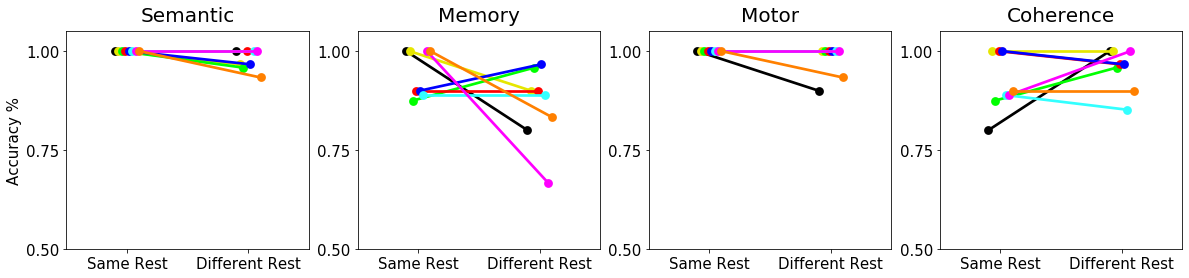

In [24]:

y=[.5,.75,1.0]
#train motor test memory 
mot=SS_broken[(SS_broken['train_task']=='motor')]
mot.drop(columns=['train_task','test_task'],inplace=True)
mot=mot.groupby('sub').mean()
mot.reset_index(inplace=True)
mot=pd.melt(mot, id_vars=['sub'], value_vars=['Different Rest', 'Same Rest'],var_name='Analysis', value_name='acc')

mem=SS_broken[(SS_broken['train_task']=='mem')]
mem.drop(columns=['train_task','test_task'],inplace=True)
mem=mem.groupby('sub').mean()
mem.reset_index(inplace=True)
mem=pd.melt(mem, id_vars=['sub'], value_vars=['Different Rest', 'Same Rest'],var_name='Analysis', value_name='acc')

#train glass test motor 
glass=SS_broken[(SS_broken['train_task']=='glass')]
glass.drop(columns=['train_task','test_task'],inplace=True)
glass=glass.groupby('sub').mean()
glass.reset_index(inplace=True)
glass=pd.melt(glass, id_vars=['sub'], value_vars=['Different Rest', 'Same Rest'],var_name='Analysis', value_name='acc')

#train semantic test motor 
sem=SS_broken[(SS_broken['train_task']=='semantic')]
sem.drop(columns=['train_task','test_task'],inplace=True)
sem=sem.groupby('sub').mean()
sem.reset_index(inplace=True)
sem=pd.melt(sem, id_vars=['sub'], value_vars=['Different Rest', 'Same Rest'],var_name='Analysis', value_name='acc')

#Different Rest task 
fig=plt.figure(figsize=(20,4), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 1 rows by 3 columns
gs = gridspec.GridSpec(nrows=1, ncols=4)


#Semantic 
ax1=fig.add_subplot(gs[0,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same Rest','Different Rest'],dodge=True,ci=None, data=sem, ax=ax1)
ax.set_title('Semantic',fontsize=20, pad=10)
ax.set(xlabel='')
plt.ylabel("Accuracy %", fontsize=15)
ax.legend_.remove()
ax.set(ylim=(0.5, 1.05))
#plt.setp(ax1.get_xticklabels(), visible=False)
ax.tick_params(labelsize=15)
plt.yticks(y)

#Memory 
ax4=fig.add_subplot(gs[0,1],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same Rest','Different Rest'],dodge=True,ci=None, data=mem, ax=ax4)
ax.set_title('Memory',fontsize=20, pad=10)
ax.set(xlabel='', ylabel=' ')
ax.legend_.remove()
#plt.setp(ax4.get_xticklabels(), visible=False)
ax.set(ylim=(0.5, 1.05))
#plt.yticks(y)
ax.tick_params(labelsize=15)


#Motor 
ax8=fig.add_subplot(gs[0,2],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same Rest','Different Rest'],dodge=True,ci=None, data=mot, ax=ax8)
ax.set_title('Motor',fontsize=20, pad=10)
ax.set(xlabel='',ylabel=' ')
ax.legend_.remove()
ax.tick_params(labelsize=15)
ax.set(ylim=(0.5, 1.05))
#plt.yticks(y)
#plt.setp(ax8.get_xticklabels(), visible=False)
ax.tick_params(labelsize=15)

#glass 
ax12=fig.add_subplot(gs[0,3],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="sub",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same Rest','Different Rest'],dodge=True,ci=None, data=glass, ax=ax12)
ax.set_title('Coherence',fontsize=20, pad=10)
ax.set(xlabel='',ylabel=' ')
ax.legend_.remove()
ax.set(ylim=(0.5, 1.05))
#plt.yticks(y)
ax.tick_params(labelsize=15)


#* train mem test glass 
#** mem semantic and motor glass and semantic motor 
#***  semantic mem and semantix glass and glass test all 

plt.savefig(thisDir+'output/FigsFinal/SS_broken_sepRest_plots.png', bbox_inches='tight')


In [13]:

Ridge=Ridge_SS[['train','task','same_subT','diffT']]
Ridge.rename(columns={'same_subT':'Same','diffT':'Diff'},inplace=True)
Ridge.reset_index(inplace=True)
Ridge=pd.melt(Ridge, id_vars=['train','task'], value_vars=['Same','Diff'],var_name='Analysis',value_name='acc')

SVM=SVM_SS[['train','task','same_subT','diffT']]
SVM.rename(columns={'same_subT':'Same','diffT':'Diff'},inplace=True)
SVM.reset_index(inplace=True)
SVM=pd.melt(SVM, id_vars=['train','task'], value_vars=['Same','Diff'],var_name='Analysis',value_name='acc')


In [7]:
allR=allres[['train','same_subR','diff_subR']]
allT=allres[['train','same_subT','diff_subT']]
allT.rename(columns={'same_subT':'Same Person Task','diff_subT':'Different Person Task'},inplace=True)
allR.rename(columns={'same_subR':'Same Person Rest','diff_subR':'Different Person Rest'},inplace=True)
allT.reset_index(inplace=True)
allR.reset_index(inplace=True)
allTask=pd.melt(allT, id_vars=['train'], value_vars=['Same Person Task','Different Person Task'],var_name='Analysis',value_name='acc')
allRest=pd.melt(allR, id_vars=['train'], value_vars=['Same Person Rest','Different Person Rest'],var_name='Analysis',value_name='acc')


NameError: name 'allres' is not defined

In [8]:
DSR=DS[['train','task','same_subR','diff_subR']]
DST=DS[['train','task','same_subT','diff_subT']]
DST.rename(columns={'same_subT':'Same Person Task','diff_subT':'Different Person Task'},inplace=True)
DSR.rename(columns={'same_subR':'Same Person Rest','diff_subR':'Different Person Rest'},inplace=True)
DST.reset_index(inplace=True)
DSR.reset_index(inplace=True)
DST=pd.melt(DST, id_vars=['train','task'], value_vars=['Same Person Task','Different Person Task'],var_name='Analysis',value_name='acc')
DSR=pd.melt(DSR, id_vars=['train','task'], value_vars=['Same Person Rest','Different Person Rest'],var_name='Analysis',value_name='acc')


NameError: name 'DS' is not defined

Text(0.5, 0, '')

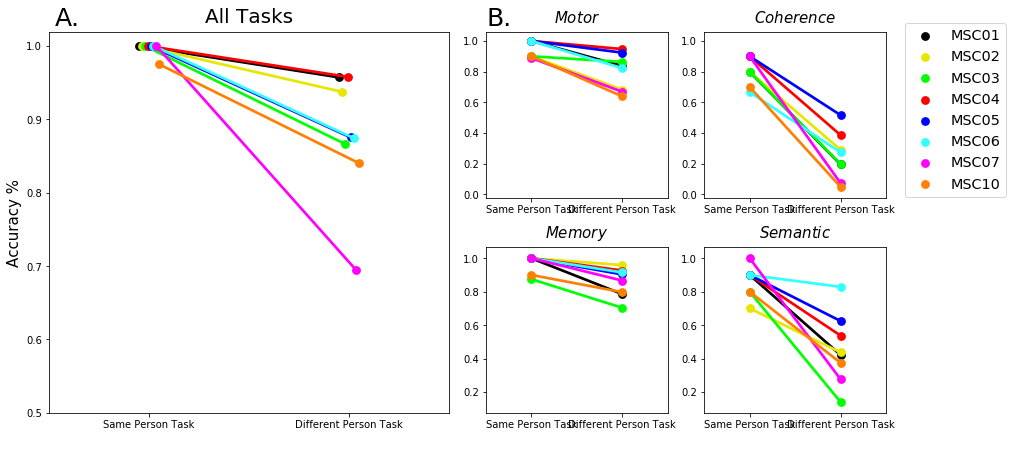

In [86]:
#reorganizing figure 1

#Same Task (Fig 1)
fig=plt.figure(figsize=(15,7), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 1 rows by 3 columns
gs = gridspec.GridSpec(nrows=2, ncols=4, wspace=.2, hspace=.3)

fig.text(.13, .893, 'A.',fontsize=25)
fig.text(.53, .893, 'B.',fontsize=25)
"""
fig.text(.13, .465, 'C.',fontsize=20)
fig.text(.55, .465, 'D.',fontsize=20)
"""
#allres
ax0=fig.add_subplot(gs[0:,:2])
ax=sns.pointplot(x="Analysis",y="acc", hue="train", ax=ax0,ci=None, data=allTask, dodge=.1,order=['Same Person Task','Different Person Task'],color='r', palette=['1','2','3','4','5','6','7','10'])
ax.legend_.remove()
ax.set_title('All Tasks', fontsize=20, pad=10)
y=[.5,.6,.7,.8,.9,1.0]
plt.yticks(y)
plt.ylabel("Accuracy %", fontsize=15)
plt.xlabel(' ')

#motor
ax1=fig.add_subplot(gs[0,2])
ax=sns.pointplot(x="Analysis",y="acc", hue="train", ci=None, data=DST[DST['task']=='motor'], ax=ax1, order=['Same Person Task','Different Person Task'], color='r', palette=['1','2','3','4','5','6','7','10'])
ax.legend_.remove()
ax.set_title('$Motor$', fontsize=15, pad=10)
plt.xlabel('')
plt.ylabel(' ')
#mixed
ax2=fig.add_subplot(gs[0,3],sharey=ax1)
#plt.setp(ax2.get_yticklabels(), visible=False)
ax=sns.pointplot(x="Analysis",y="acc", hue="train", ci=None, data=DST[DST['task']=='glass'], ax=ax2, order=['Same Person Task','Different Person Task'], color='r', palette=['1','2','3','4','5','6','7','10'])
ax.legend_.remove()
ax.set_title('$Coherence$', fontsize=15, pad=10)
plt.ylabel('')
plt.xlabel('')
#memory
ax3=fig.add_subplot(gs[1,2])
ax=sns.pointplot(x="Analysis",y="acc", hue="train", ci=None, data=DST[DST['task']=='mem'],ax=ax3, order=['Same Person Task','Different Person Task'], color='r', palette=['1','2','3','4','5','6','7','10'])
ax.legend_.remove()
ax.set_title('$Memory$', fontsize=15, pad=10)
plt.ylabel(' ')
plt.xlabel(' ')

ax4=fig.add_subplot(gs[1,3],sharey=ax3)
#plt.setp(ax4.get_yticklabels(), visible=False)
ax=sns.pointplot(x="Analysis",y="acc", hue="train", ci=None, data=DST[DST['task']=='semantic'],ax=ax4, order=['Same Person Task','Different Person Task'], color='r', palette=['1','2','3','4','5','6','7','10'])
plt.legend(bbox_to_anchor=(1.7, 2.4),loc='upper right',fontsize='x-large')
ax.set_title('$Semantic$', fontsize=15, pad=10)
plt.ylabel('')
plt.xlabel('')




#plt.savefig(thisDir+'output/FigsFinal/taskSeperate_Plot.png', bbox_inches='tight')






Text(0.5, 0, '')

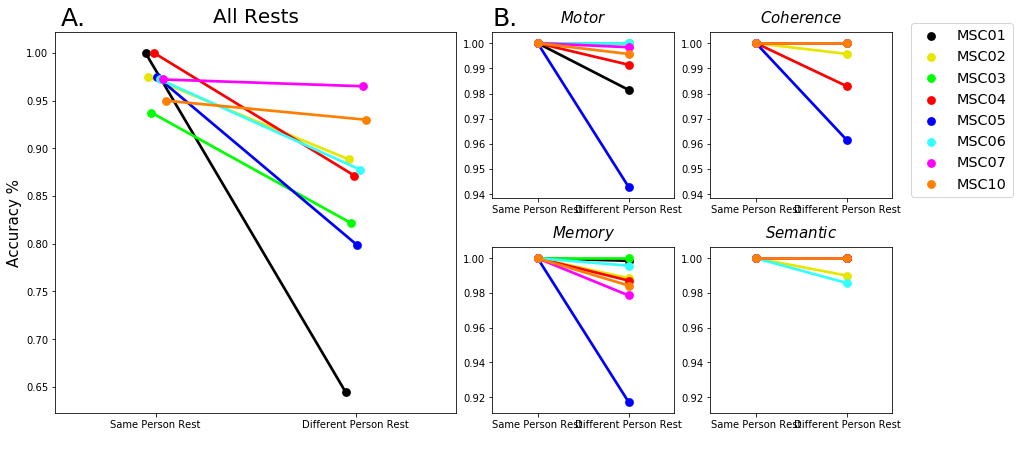

In [87]:
#reorganizing figure 1

#Same Rest (Fig 1)
fig=plt.figure(figsize=(15,7), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
#Add grid space for subplots 1 rows by 3 columns
gs = gridspec.GridSpec(nrows=2, ncols=4, wspace=.2, hspace=.3)

fig.text(.13, .893, 'A.',fontsize=25)
fig.text(.53, .893, 'B.',fontsize=25)
"""
fig.text(.13, .465, 'C.',fontsize=20)
fig.text(.55, .465, 'D.',fontsize=20)
"""
#allres
ax0=fig.add_subplot(gs[0:,:2])
ax=sns.pointplot(x="Analysis",y="acc", hue="train", ax=ax0,ci=None, data=allRest, dodge=.1,order=['Same Person Rest','Different Person Rest'],color='r', palette=['1','2','3','4','5','6','7','10'])
ax.legend_.remove()
ax.set_title('All Rests', fontsize=20, pad=10)
#y=[.5,.6,.7,.8,.9,1.0]
#plt.yticks(y)
plt.ylabel("Accuracy %", fontsize=15)
plt.xlabel(' ')

#motor
ax1=fig.add_subplot(gs[0,2])
ax=sns.pointplot(x="Analysis",y="acc", hue="train", ci=None, data=DSR[DSR['task']=='motor'], ax=ax1, order=['Same Person Rest','Different Person Rest'], color='r', palette=['1','2','3','4','5','6','7','10'])
ax.legend_.remove()
ax.set_title('$Motor$', fontsize=15, pad=10)
plt.xlabel('')
plt.ylabel(' ')
#mixed
ax2=fig.add_subplot(gs[0,3],sharey=ax1)
#plt.setp(ax2.get_yticklabels(), visible=False)
ax=sns.pointplot(x="Analysis",y="acc", hue="train", ci=None, data=DSR[DSR['task']=='glass'], ax=ax2, order=['Same Person Rest','Different Person Rest'], color='r', palette=['1','2','3','4','5','6','7','10'])
ax.legend_.remove()
ax.set_title('$Coherence$', fontsize=15, pad=10)
plt.ylabel('')
plt.xlabel('')
#memory
ax3=fig.add_subplot(gs[1,2])
ax=sns.pointplot(x="Analysis",y="acc", hue="train", ci=None, data=DSR[DSR['task']=='mem'],ax=ax3, order=['Same Person Rest','Different Person Rest'], color='r', palette=['1','2','3','4','5','6','7','10'])
ax.legend_.remove()
ax.set_title('$Memory$', fontsize=15, pad=10)
plt.ylabel(' ')
plt.xlabel(' ')

ax4=fig.add_subplot(gs[1,3],sharey=ax3)
#plt.setp(ax4.get_yticklabels(), visible=False)
ax=sns.pointplot(x="Analysis",y="acc", hue="train", ci=None, data=DSR[DSR['task']=='semantic'],ax=ax4, order=['Same Person Rest','Different Person Rest'], color='r', palette=['1','2','3','4','5','6','7','10'])
plt.legend(bbox_to_anchor=(1.7, 2.4),loc='upper right',fontsize='x-large')
ax.set_title('$Semantic$', fontsize=15, pad=10)
plt.ylabel('')
plt.xlabel('')




#plt.savefig(thisDir+'output/FigsFinal/restSeperate_Plot.png', bbox_inches='tight')






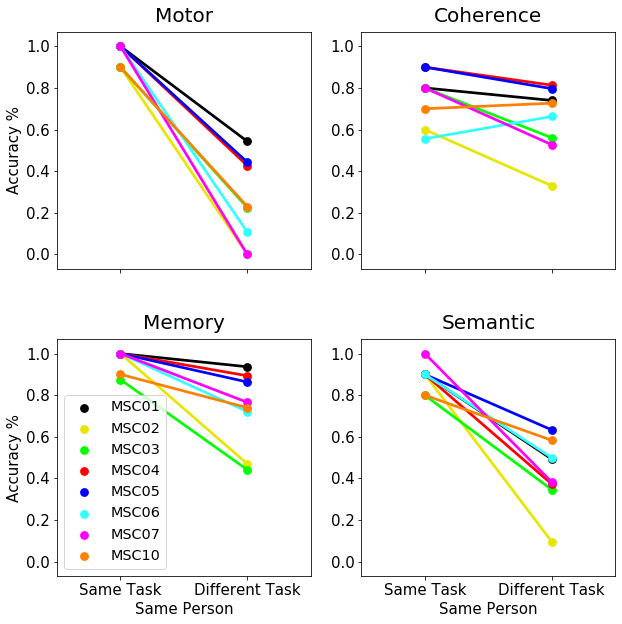

In [10]:

#Comparing same train same task v diff task (Fig 2)
fig=plt.figure(figsize=(10,10), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
gs = gridspec.GridSpec(nrows=2, ncols=2,wspace=.2,hspace=.3)
#Broad overview of changing from same task to diff task
#All Glass


ax1=fig.add_subplot(gs[0,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="train",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=Ridge[Ridge['task']=='motor'], ax=ax1)
ax.set_title('Motor',fontsize=20, pad=10)
ax.set(xlabel='')
plt.ylabel('Accuracy %',fontsize=15)

ax.legend_.remove()
position=(0,1)
labels=("Same Task","Different Task")
plt.xticks(position,labels)
plt.setp(ax1.get_xticklabels(), visible=False)
ax.tick_params(labelsize=15)
#All Memory
ax2=fig.add_subplot(gs[0,1],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="train",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=Ridge[Ridge['task']=='glass'], ax=ax2)
ax.set_title('Coherence',fontsize=20, pad=10)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()

position=(0,1)
labels=("Same Task","Different Task")
plt.xticks(position,labels)
plt.setp(ax2.get_xticklabels(), visible=False)
ax.tick_params(labelsize=15)
#all Motor
ax3=fig.add_subplot(gs[1,0],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="train",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=Ridge[Ridge['task']=='mem'], ax=ax3)
ax.set_title('Memory',fontsize=20, pad=10)
plt.xlabel('Same Person',fontsize=15)
plt.ylabel('Accuracy %',fontsize=15)
ax.legend_.remove()
position=(0,1)
labels=("Same Task","Different Task")
plt.xticks(position,labels)
plt.legend(loc='lower left',fontsize='x-large')
ax.tick_params(labelsize=15)

#all semantic
ax4=fig.add_subplot(gs[1,1],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="train",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=Ridge[Ridge['task']=='semantic'],ax=ax4)
ax.set_title('Semantic',fontsize=20, pad=10)
plt.xlabel('Same Person', fontsize=15)
ax.set(ylabel='')
position=(0,1)
labels=("Same Task","Different Task")
plt.xticks(position,labels)
ax.legend_.remove()
ax.tick_params(labelsize=15)

plt.savefig(thisDir+'output/FigsFinal/Ridge_TaskONLY_CVmSS_plots.png', bbox_inches='tight')



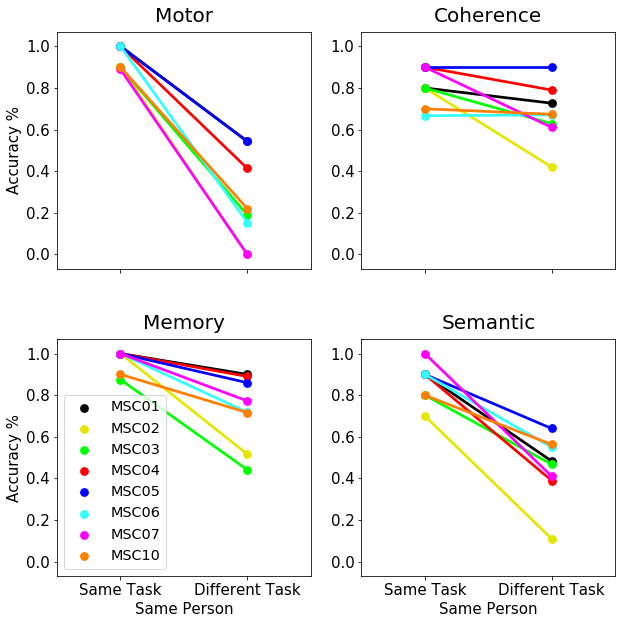

In [6]:

#Comparing same train same task v diff task (Fig 2)
fig=plt.figure(figsize=(10,10), constrained_layout=True)
plt.rcParams['figure.constrained_layout.use'] = True
gs = gridspec.GridSpec(nrows=2, ncols=2,wspace=.2,hspace=.3)
#Broad overview of changing from same task to diff task
#All Glass


ax1=fig.add_subplot(gs[0,0])
ax=sns.pointplot(x="Analysis",y="acc", hue="train",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=SVM[SVM['task']=='motor'], ax=ax1)
ax.set_title('Motor',fontsize=20, pad=10)
ax.set(xlabel='')
plt.ylabel('Accuracy %',fontsize=15)

ax.legend_.remove()
position=(0,1)
labels=("Same Task","Different Task")
plt.xticks(position,labels)
plt.setp(ax1.get_xticklabels(), visible=False)
ax.tick_params(labelsize=15)
#All Memory
ax2=fig.add_subplot(gs[0,1],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="train",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=SVM[SVM['task']=='glass'], ax=ax2)
ax.set_title('Coherence',fontsize=20, pad=10)
ax.set(xlabel='')
ax.set(ylabel='')
ax.legend_.remove()

position=(0,1)
labels=("Same Task","Different Task")
plt.xticks(position,labels)
plt.setp(ax2.get_xticklabels(), visible=False)
ax.tick_params(labelsize=15)
#all Motor
ax3=fig.add_subplot(gs[1,0],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="train",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=SVM[SVM['task']=='mem'], ax=ax3)
ax.set_title('Memory',fontsize=20, pad=10)
plt.xlabel('Same Person',fontsize=15)
plt.ylabel('Accuracy %',fontsize=15)
ax.legend_.remove()
position=(0,1)
labels=("Same Task","Different Task")
plt.xticks(position,labels)
plt.legend(loc='lower left',fontsize='x-large')
ax.tick_params(labelsize=15)

#all semantic
ax4=fig.add_subplot(gs[1,1],sharey=ax1)
ax=sns.pointplot(x="Analysis",y="acc", hue="train",color='r', palette=['1','2','3','4','5','6','7','10'],order=['Same','Diff'],ci=None, data=SVM[SVM['task']=='semantic'],ax=ax4)
ax.set_title('Semantic',fontsize=20, pad=10)
plt.xlabel('Same Person', fontsize=15)
ax.set(ylabel='')
position=(0,1)
labels=("Same Task","Different Task")
plt.xticks(position,labels)
ax.legend_.remove()
ax.tick_params(labelsize=15)

plt.savefig(thisDir+'output/FigsFinal/SVM_TaskONLY_CVmSS_plots.png', bbox_inches='tight')



In [11]:
from matplotlib.lines import Line2D
import matplotlib.patches as patches
SS_legend_elements = [Line2D([0], [0], color='blue', lw=4, label='Same Person'),Line2D([0], [0], color='orange', lw=4, label='Different Person')]
multi=pd.read_csv(outDir+'ALL/multiclass_acc.csv')
mc=multi[['train','same_sub','diff_sub']]
multiclass=pd.melt(mc,id_vars=['train'],value_vars=['same_sub','diff_sub'],var_name='Analysis',value_name='acc')
F_score=multi[['train','rest_CV','mem_CV','sem_CV','mot_CV','glass_CV','rest_DS','mem_DS','sem_DS','mot_DS','glass_DS']]
MCC=multi[['train','MCC_CV','MCC_DS']]
MCC=pd.melt(MCC,id_vars=['train'],value_vars=['MCC_CV','MCC_DS'], var_name='Analysis',value_name='MCC')
mc=MCC['Analysis'].str.split("_", n=1, expand=True)
MCC['analysis']=mc[1]
MCC.drop(columns=['Analysis'],inplace=True)

F1=pd.melt(F_score, id_vars=['train'], value_vars=['rest_CV','mem_CV','sem_CV','mot_CV','glass_CV','rest_DS','mem_DS','sem_DS','mot_DS','glass_DS'],var_name='Analysis',value_name='f')
task=F1['Analysis'].str.split("_", n=1, expand=True)

F1['Task']=task[0]
F1['analysis']=task[1]

F1.drop(columns=['Analysis'],inplace=True)

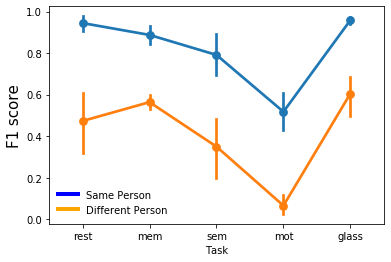

In [8]:
ax=sns.pointplot(x="Task",y="f", hue="analysis",data=F1)
plt.ylabel('F1 score',fontsize=15)
L1=plt.legend(handles=SS_legend_elements,loc='lower left',frameon=False)
plt.savefig(thisDir+'output/FigsFinal/F1_multiclass_plots.png', bbox_inches='tight')

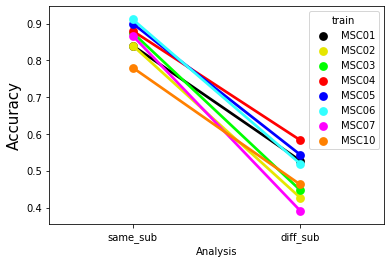

In [4]:
ax=sns.pointplot(x="Analysis",y="acc", hue="train",data=multiclass,color='r', palette=['1','2','3','4','5','6','7','10'])
plt.ylabel('Accuracy',fontsize=15)
plt.savefig(thisDir+'output/FigsFinal/acc_multiclass_plots.png', bbox_inches='tight')


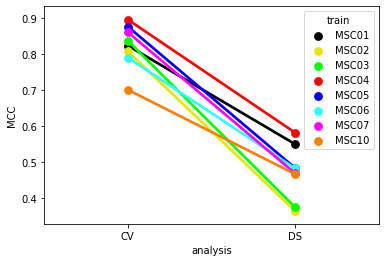

In [13]:
ax=sns.pointplot(x="analysis",y="MCC", hue="train",data=MCC,color='r', palette=['1','2','3','4','5','6','7','10'])

#ax=sns.pointplot(x="Task",y="f", hue="analysis",data=F1)

In [20]:
SS.groupby(['train_task','test_task']).mean()

same_task  diff_task
train_task test_task                      
glass      mem         0.756944   0.527951
           motor       0.756944   0.591806
           semantic    0.756944   0.800139
mem        glass       0.971875   0.692674
           motor       0.971875   0.742465
           semantic    0.971875   0.749375
motor      glass       0.962500   0.308086
           mem         0.962500   0.221562
           semantic    0.962500   0.209861
semantic   glass       0.887500   0.614167
           mem         0.887500   0.396563
           motor       0.887500   0.261528